# INSTALLATION

## Installer la bibliothèque BigQuery

In [1]:
pip install --upgrade google-cloud-bigquery

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


Installer db-dtypes est nécessaireparce que la fonction to_dataframe() de l'objet client.query() de BigQuery nécessite une dépendance appelée "db-dtypes" qui n'est pas installée sur votre système. Cette dépendance est utilisée pour gérer les types de données de la requête SQL.

In [3]:
!pip install db-dtypes


In [76]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
      --------------------------------------- 0.2/9.2 MB 4.6 MB/s eta 0:00:02
      --------------------------------------- 0.2/9.2 MB 4.6 MB/s eta 0:00:02
     -- ------------------------------------- 0.6/9.2 MB 4.8 MB/s eta 0:00:02
     --- ------------------------------------ 0.9/9.2 MB 4.9 MB/s eta 0:00:02
     ---- ----------------------------------- 1.1/9.2 MB 5.0 MB/s eta 0:00:02
     ---- ----------------------------------- 1.1/9.2 MB 4.8 MB/s eta 0:00:02
     ----- ---------------------------------- 1.3/9.2 MB 4.1 MB/s eta 0:00:02
     ------ --------------------------------- 1.5/9.2 MB 4.2 MB/s eta 0:00:02
     ------- -------------------------------- 1.8/9.2 MB 4.3 MB/s eta 0:00:02
     -------- ------------------------------- 2.0/9.2 MB 4.4 MB/s eta 0:00:02
     --------- ------------------------------ 2.2/9.2 MB 4.5 MB/s eta 0:00:02
     ---------- ----------------------------- 2.5/9.2 MB 4.5 MB/s eta 0

# IMPORT DES BIBLIOTHEQUES

In [4]:
from google.cloud import bigquery # pour interagir avec BigQuery

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd
import numpy as np

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
from sklearn.metrics import recall_score, f1_score, classification_report, roc_curve, roc_auc_score

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [89]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [114]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

In [8]:
import os

Il faut récupérer une clé JSON à partir de BigQuery. Télécharger la clé JSON (en local) du compte de service créé sur GCP. Assurez-vous que ce compte ait des autorisations suffisantes pour accéder à BigQuery.

Spécifier le chemin dans la commande ci-dessous.

Configurer les variables d'environnement pour que Google Cloud utilise cette clé JSON.

In [9]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'C:\Users\Laetitia_Deken\Documents\Data\Projets\Chicago_Taxi_Trips\mon-premier-projet-383610-cdfc10d43f02.json'
os

<module 'os' from 'C:\\Users\\Laetitia_Deken\\anaconda3\\lib\\os.py'>

Initialiser le client BigQuery en utilisant la clé JSON configurée précédemment.

In [10]:
# Créer une instance du client BigQuery
client = bigquery.Client()
client

## Test : récupérer les 10 premières lignes de la table

In [10]:
query = """
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
LIMIT 10
"""

df_limit_10 = client.query(query).to_dataframe()
df_limit_10


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,864db0ec41e1c36a1c3e8639ffd26582ff4c1e08,57dbcc9d59c0730235c8d003188f5e4a109acd35a61266...,2017-12-31 02:00:00+00:00,2017-12-31 02:15:00+00:00,360,0.0,<NA>,<NA>,<NA>,<NA>,...,1.5,7.75,Cash,Blue Ribbon Taxi Association Inc.,NaN,NaN,None,NaN,NaN,None
1,246875b349bba32790522176d58aa84dc3bde4b1,11c21d0290e089e5de4a3c49612642df5cd364c7fd1bf8...,2017-12-31 02:00:00+00:00,2017-12-31 02:15:00+00:00,720,1.6,<NA>,<NA>,<NA>,<NA>,...,1.0,9.75,Cash,Star North Management LLC,NaN,NaN,None,NaN,NaN,None
2,7c739b1e4480cb749700a08729fb2d310cdbe147,5e6be7ac48ec46a91b821c0c49970473472d903f820a7f...,2017-12-31 17:45:00+00:00,2017-12-31 17:45:00+00:00,0,0.0,<NA>,<NA>,<NA>,<NA>,...,2.5,5.75,Cash,Taxi Affiliation Services,NaN,NaN,None,NaN,NaN,None
3,b1185a0c47a3ecd76a385369f20deab67d5962c4,aba7b7acc0bc874f790aa6859ab9566f67d3b3dc992062...,2017-12-31 17:45:00+00:00,2017-12-31 18:00:00+00:00,1260,12.5,<NA>,17031081401,<NA>,8,...,4.0,36.50,Credit Card,Taxi Affiliation Services,NaN,NaN,None,41.895033,-87.619711,POINT (-87.6197106717 41.8950334495)
4,5ccaa596e1863328a88719f66e4ad9f222d27b77,faae54dec275b76c21410117883cd1421b2548bc9a54c7...,2016-04-13 18:00:00+00:00,2016-04-13 18:15:00+00:00,360,0.6,<NA>,<NA>,<NA>,<NA>,...,0.0,5.25,Cash,None,NaN,NaN,None,NaN,NaN,None
5,f300ca6c1690be7d713b24c08bbb1ecdbaf9dbf0,4b92a02bf38d961c406e957edbe057dcafbd12d849d136...,2017-12-30 14:00:00+00:00,2017-12-30 14:15:00+00:00,1080,0.1,17031839100,17031330100,32,33,...,1.0,12.25,Cash,Blue Ribbon Taxi Association Inc.,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
6,df5ff501f635a48d587ce91d8b8051d854053794,daec6716a2e6fd6b94b2607889375c7b14300494e2ea46...,2017-12-30 14:00:00+00:00,2017-12-30 14:15:00+00:00,300,0.0,17031839100,17031081800,32,8,...,2.5,8.75,Cash,Blue Ribbon Taxi Association Inc.,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)
7,8017b30f157ca98893c22d337726a47136960462,21c5d83c2cb73035c6c4d35da452ff1714aff86f5efb32...,2017-12-30 23:45:00+00:00,2017-12-31 00:00:00+00:00,480,1.4,<NA>,<NA>,<NA>,<NA>,...,1.0,8.25,Cash,Choice Taxi Association,NaN,NaN,None,NaN,NaN,None
8,6056644443da277ab37598a3edb11c3b24060380,faae54dec275b76c21410117883cd1421b2548bc9a54c7...,2016-04-13 18:30:00+00:00,2016-04-13 19:00:00+00:00,1680,11.8,<NA>,<NA>,<NA>,<NA>,...,0.0,37.80,Credit Card,None,NaN,NaN,None,NaN,NaN,None
9,c009899b76065766e4c4d9458aafa4b9e9709fca,259d38cfdbc9ac6f9bb01f0df740e0ddf4a631a70bbdd6...,2017-12-31 04:15:00+00:00,2017-12-31 04:15:00+00:00,0,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,14.50,Credit Card,Suburban Dispatch LLC,NaN,NaN,None,NaN,NaN,None


# INFORMATIONS SUR LE DATASET

## Afficher le nombre de lignes et de colonnes

In [11]:
# Spécifier la requête SQL avec Python pour obtenir le nombre de lignes
query_rows = """
SELECT COUNT(*) as num_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
"""

In [12]:
# Spécifier la requête SQL avec Python pour obtenir le nombre de colonnes
query_columns = """
SELECT COUNT(DISTINCT column_name) as num_columns
FROM `bigquery-public-data.chicago_taxi_trips.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'taxi_trips'
"""

Dans le contexte de SQL et des bases de données relationnelles, INFORMATION_SCHEMA est utilisé pour interroger et obtenir des informations sur la structure des bases de données sans avoir besoin de connaître les détails spécifiques du système de gestion de base de données sous-jacent. Cela permet aux développeurs et aux administrateurs de bases de données de récupérer des métadonnées sur les tables, les colonnes et d'autres objets de la base de données sans écrire des requêtes spécifiques à une base de données particulière.

In [13]:
# Exécuter la première requête pour obtenir le nombre de lignes
query_job_rows = client.query(query_rows)
result_rows = query_job_rows.result()

In [14]:
# Exécuter la deuxième requête pour obtenir le nombre de colonnes distinctes
query_job_columns = client.query(query_columns)
result_columns = query_job_columns.result()

In [15]:
# Récupérer les résultats des requêtes
for row in result_rows:
    num_rows = row["num_rows"]

for row in result_columns:
    num_columns = row["num_columns"]

print(f"Nombre de lignes : {num_rows}")
print(f"Nombre de colonnes distinctes : {num_columns}")

Nombre de lignes : 209497488
Nombre de colonnes distinctes : 23


Nous obtenons donc plus de 20 millions de lignes réparties en 23 colonnes. D'où l'intérêt d'utiliser BigQuery ici.

Google Sheets est limité, rappelons-le, à 10 millions de cellules.

## Afficher les types des données

Pour afficher les types de données des colonnes de la table taxi_trips dans BigQuery, il est possible d'exécuter une requête SQL pour obtenir ces informations à partir du schéma d'information (INFORMATION_SCHEMA).

Note : on est pas obligé ici de créer une instance du client BigQuery, puisqu'on l'a fait auparavant.

In [16]:
# Spécifier la requête SQL pour obtenir les types de données de chaque colonne
query_types = """
SELECT column_name, data_type
FROM `bigquery-public-data.chicago_taxi_trips.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'taxi_trips'
"""

L'INFORMATION_SCHEMA est une convention largement utilisée dans les systèmes de gestion de base de données relationnelles (RDBMS) pour stocker des métadonnées sur la structure des bases de données. Il agit essentiellement comme un catalogue de données qui contient des informations sur les bases de données elles-mêmes, les tables, les colonnes, les index, les contraintes, les vues, les procédures stockées, et d'autres objets de la base de données.

Dans le contexte de SQL et des bases de données relationnelles, l'INFORMATION_SCHEMA est utilisé pour interroger et obtenir des informations sur la structure des bases de données sans avoir besoin de connaître les détails spécifiques du système de gestion de base de données sous-jacent. Cela permet aux développeurs et aux administrateurs de bases de données de récupérer des métadonnées sur les tables, les colonnes et d'autres objets de la base de données sans écrire des requêtes spécifiques à une base de données particulière.

In [17]:
# Exécuter la requête pour obtenir les types de données
query_job_types = client.query(query_types)
result_types = query_job_types.result()

In [18]:
# Créer un dictionnaire pour stocker les types de données
column_types = {}

In [19]:
# Récupérer les résultats de la requête et stocker les types de données dans le dictionnaire créé ci-dessus
for row in result_types:
    column_name = row["column_name"]
    data_type = row["data_type"]
    column_types[column_name] = data_type

In [20]:
# Afficher les types de données des colonnes
for column, data_type in column_types.items():
    print(f"Colonne : {column}, Type de données : {data_type}")

Colonne : unique_key, Type de données : STRING
Colonne : taxi_id, Type de données : STRING
Colonne : trip_start_timestamp, Type de données : TIMESTAMP
Colonne : trip_end_timestamp, Type de données : TIMESTAMP
Colonne : trip_seconds, Type de données : INT64
Colonne : trip_miles, Type de données : FLOAT64
Colonne : pickup_census_tract, Type de données : INT64
Colonne : dropoff_census_tract, Type de données : INT64
Colonne : pickup_community_area, Type de données : INT64
Colonne : dropoff_community_area, Type de données : INT64
Colonne : fare, Type de données : FLOAT64
Colonne : tips, Type de données : FLOAT64
Colonne : tolls, Type de données : FLOAT64
Colonne : extras, Type de données : FLOAT64
Colonne : trip_total, Type de données : FLOAT64
Colonne : payment_type, Type de données : STRING
Colonne : company, Type de données : STRING
Colonne : pickup_latitude, Type de données : FLOAT64
Colonne : pickup_longitude, Type de données : FLOAT64
Colonne : pickup_location, Type de données : STRIN

## Afficher le nombre de valeurs nulles pour chaque colonne

Maintenant que nous avons récupéré les types, nous allons chercher à recueillr le nombre de valeurs nulles pour chaque colonne.

Là encore, inutile de créer l'instance du client BigQuery si déjà fait au-dessus, sinon, ajouter : client = bigquery.Client()

In [21]:
# Définir un nom pour la table
table_name = 'bigquery-public-data.chicago_taxi_trips.taxi_trips'

In [22]:
# Liste des colonnes et leurs types de données associées dans une liste
columns = [
    {"name": "unique_key", "type": "STRING"},
    {"name": "taxi_id", "type": "STRING"},
    {"name": "trip_start_timestamp", "type": "TIMESTAMP"},
    {"name": "trip_end_timestamp", "type": "TIMESTAMP"},
    {"name": "trip_seconds", "type": "INT64"},
    {"name": "trip_miles", "type": "FLOAT64"},
    {"name": "pickup_census_tract", "type": "INT64"},
    {"name": "dropoff_census_tract", "type": "INT64"},
    {"name": "pickup_community_area", "type": "INT64"},
    {"name": "dropoff_community_area", "type": "INT64"},
    {"name": "fare", "type": "FLOAT64"},
    {"name": "tips", "type": "FLOAT64"},
    {"name": "tolls", "type": "FLOAT64"},
    {"name": "extras", "type": "FLOAT64"},
    {"name": "trip_total", "type": "FLOAT64"},
    {"name": "payment_type", "type": "STRING"},
    {"name": "company", "type": "STRING"},
    {"name": "pickup_latitude", "type": "FLOAT64"},
    {"name": "pickup_longitude", "type": "FLOAT64"},
    {"name": "pickup_location", "type": "STRING"},
    {"name": "dropoff_latitude", "type": "FLOAT64"},
    {"name": "dropoff_longitude", "type": "FLOAT64"},
    {"name": "dropoff_location", "type": "STRING"}
]

On a donc des float (nombre décimaux), des integer (nombre entiers), des timestamp (horodatages = date et heure) et des string (chaînes de caractères).

In [23]:
# Création d'une fonction avec une requête SQL pour compter les valeurs nulles pour une colonne précise
def count_nulls(column):
    query = f"""
    SELECT COUNT(*) as num_nulls
    FROM {table_name}
    WHERE {column['name']} IS NULL
    """
    query_job = client.query(query)
    result = query_job.result()
    for row in result:
        return row["num_nulls"]

In [24]:
# Afficher le nombre de valeurs nulles pour chaque colonne grâce à une boucle for
for column in columns:
    null_count = count_nulls(column)
    print(f"Colonne : {column['name']}, Type : {column['type']}, Valeurs nulles : {null_count}")

Colonne : unique_key, Type : STRING, Valeurs nulles : 0
Colonne : taxi_id, Type : STRING, Valeurs nulles : 0
Colonne : trip_start_timestamp, Type : TIMESTAMP, Valeurs nulles : 0
Colonne : trip_end_timestamp, Type : TIMESTAMP, Valeurs nulles : 18436
Colonne : trip_seconds, Type : INT64, Valeurs nulles : 1302057
Colonne : trip_miles, Type : FLOAT64, Valeurs nulles : 2891
Colonne : pickup_census_tract, Type : INT64, Valeurs nulles : 76711540
Colonne : dropoff_census_tract, Type : INT64, Valeurs nulles : 77640471
Colonne : pickup_community_area, Type : INT64, Valeurs nulles : 24117990
Colonne : dropoff_community_area, Type : INT64, Valeurs nulles : 28406155
Colonne : fare, Type : FLOAT64, Valeurs nulles : 15707
Colonne : tips, Type : FLOAT64, Valeurs nulles : 15707
Colonne : tolls, Type : FLOAT64, Valeurs nulles : 32903511
Colonne : extras, Type : FLOAT64, Valeurs nulles : 15707
Colonne : trip_total, Type : FLOAT64, Valeurs nulles : 15707
Colonne : payment_type, Type : STRING, Valeurs null

# EXPLORATORY DATA ANALYSIS

## Nombre de trajets par année

In [25]:
# Spécifier la requête SQL pour obtenir le nombre de trajets par an
query = """
SELECT
    EXTRACT(YEAR FROM trip_start_timestamp) AS year, 
    COUNT(*) as num_trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
    GROUP BY year
    ORDER BY year
"""

In [26]:
# Exécuter la requête pour obtenir le nombre de trajets par an
query_job = client.query(query)
results = query_job.result()

In [27]:
# Créer un DataFrame (attention, l'attente est longue !)
df_trips_year = pd.DataFrame(results, columns=['results'])

# Limiter le nombre de lignes affichées à 10
pd.set_option('display.max_rows', 10)

# Afficher le DataFrame avec les noms de colonnes personnalisés
df_trips_year.head()

,results
0,"(2013, 27217300)"
1,"(2014, 37395079)"
2,"(2015, 32385527)"
3,"(2016, 31756403)"
4,"(2017, 24979611)"


In [28]:
# Créer deux nouvelles colonnes à partir des valeurs existantes
df_trips_year['year'] = df_trips_year['results'].apply(lambda x: x[0])
df_trips_year['num_trips'] = df_trips_year['results'].apply(lambda x: x[1])

# Supprimer la colonne 'results' si vous ne voulez plus la conserver
df_trips_year.drop(columns=['results'], inplace=True)

# Afficher le DataFrame mis à jour
print(df_trips_year.to_string()) # to_string = afficher toutes les lignes

    year  num_trips
0   2013   27217300
1   2014   37395079
2   2015   32385527
3   2016   31756403
4   2017   24979611
5   2018   20731105
6   2019   16476440
7   2020    3888831
8   2021    3947677
9   2022    6382071
10  2023    4337444


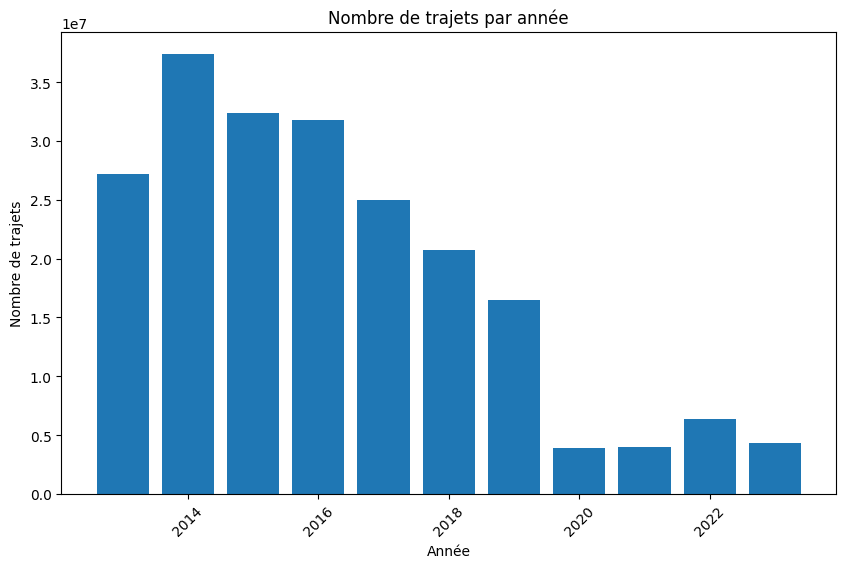

In [29]:
# Créer un graphique à barres pour afficher le nombre de trajets par année
plt.figure(figsize=(10, 6))
plt.bar(df_trips_year['year'], df_trips_year['num_trips'])
plt.title('Nombre de trajets par année')
plt.xlabel('Année')
plt.ylabel('Nombre de trajets')
plt.xticks(rotation = 45)
plt.show()

## Quelques statistiques concernant les valeurs numériques

Dans une requête SQL directe à BigQuery, il n'est pas possible d'utiliser les fonctions Python telles que shape ou describe, car ces fonctions sont spécifiques à la bibliothèque Pandas pour manipuler des DataFrames. 

Ces informations en utilisant des requêtes SQL dans BigQuery ou en convertissant les données en DataFrame après avoir exécuté une requête.

In [30]:
# Spécifier la requête SQL pour obtenir les statistiques de bases sur les colonnes de types numériques
query = """
SELECT
  ROUND(AVG(trip_seconds), 2) AS avg_trip_seconds,
  ROUND(AVG(trip_miles), 2) AS avg_trip_miles,
  ROUND(AVG(fare), 2) AS avg_fare,
  ROUND(AVG(tips), 2) AS avg_tips,
  ROUND(AVG(tolls), 2) AS avg_tolls
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
"""

In [31]:
# Exécuter la requête pour obtenir les types de données
query_job = client.query(query)
results = query_job.result()

In [32]:
# Récupérer les résultats des requêtes
for row in results:
    avg_trip_seconds = row["avg_trip_seconds"]
    avg_trip_miles = row["avg_trip_miles"]
    avg_fare = row["avg_fare"]
    avg_tips = row["avg_tips"]
    avg_tolls = row["avg_tolls"]

In [33]:
# Afficher les moyennes arrondies
print(f"Moyenne des trip_seconds : {avg_trip_seconds}")
print(f"Moyenne des trip_miles : {avg_trip_miles}")
print(f"Moyenne des fare : {avg_fare} $")
print(f"Moyenne des tips : {avg_tips} $")
print(f"Moyenne des tolls : {avg_tolls} $")

Moyenne des trip_seconds : 814.34
Moyenne des trip_miles : 3.45
Moyenne des fare : 13.71 $
Moyenne des tips : 1.47 $
Moyenne des tolls : 0.01 $


Note : données recensées au 24/09/2023.

### Convertir trip_seconds en minutes

In [34]:
# Convertir cette moyenne des trip_seconds en minutes
avg_trip_minutes = avg_trip_seconds / 60

# Afficher la moyenne en minutes
print(f"Moyenne des trip_seconds en minutes : {avg_trip_minutes:.2f}")

Moyenne des trip_seconds en minutes : 13.57


## Nombre de valeurs uniques pour chaque colonne

Encore une fois, inutile de créer l'instance du client BigQuery si déjà fait au-dessus, sinon, ajouter : client = bigquery.Client().

In [35]:
# Spécifier la requête SQL pour obtenir le nombre de valeurs uniques pour chaque colonne
query_unique = """
SELECT COUNT(DISTINCT unique_key) AS num_trips, 
       COUNT(DISTINCT taxi_id) AS num_taxi_ids, 
       COUNT(DISTINCT trip_start_timestamp) AS num_trip_starts, 
       COUNT(DISTINCT trip_end_timestamp) AS num_trip_ends, 
       COUNT(DISTINCT pickup_community_area) AS num_pickup_areas, 
       COUNT(DISTINCT dropoff_community_area) AS num_dropoff_areas
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
"""

In [36]:
# Exécuter la requête le nombre de valeurs uniques
query_job = client.query(query_unique)
results = query_job.result()

In [37]:
# Créer un DataFrame Pandas pour stocker les résultats
# df_unique_counts = pd.DataFrame(results)
# df_unique_counts

In [38]:
# Autre méthode : récupérer les résultats des requêtes avec une boucle for pour une meilleure visibilité
for row in results:
    num_trips = row["num_trips"]
    num_taxi_ids = row["num_taxi_ids"]
    num_trip_starts = row["num_trip_starts"]
    num_trip_ends = row["num_trip_ends"]
    num_pickup_areas = row["num_pickup_areas"]
    num_dropoff_areas = row["num_dropoff_areas"]

In [39]:
# Afficher les statistiques uniques
print(f"Nombre de trajets : {num_trips}")
print(f"Nombre de taxis_id uniques : {num_taxi_ids}")
print(f"Nombre de trajets démarrés : {num_trip_starts}")
print(f"Nombre de trajets terminés : {num_trip_ends}")
print(f"Nombre de zones de départ : {num_pickup_areas}")
print(f"Nombre de zones d'arrivée : {num_dropoff_areas}")

Nombre de trajets : 209497488
Nombre de taxis_id uniques : 9740
Nombre de trajets démarrés : 373825
Nombre de trajets terminés : 373837
Nombre de zones de départ : 77
Nombre de zones d'arrivée : 77


La colonne unique_key représente ici notre clé primaire, il s'agit de notre identifiant unique de trajet. 

Il existe 77 zones communautaires de départ et d'arrivée.



## Valeurs manquantes pour chaque colonne

Même remarque que précédemment, inutile de créer l'instance du client BigQuery si déjà fait au-dessus, sinon, ajouter : client = bigquery.Client().

In [40]:
# Spécifier la requête SQL pour obtenir les valeurs manquantes
query_null = """
SELECT COUNTIF(unique_key IS NULL) AS missing_unique_keys, 
       COUNTIF(taxi_id IS NULL) AS missing_taxi_ids, 
       COUNTIF(trip_start_timestamp IS NULL) AS missing_trip_starts, 
       COUNTIF(trip_end_timestamp IS NULL) AS missing_trip_ends, 
       COUNTIF(pickup_community_area IS NULL) AS missing_pickup_areas, 
       COUNTIF(dropoff_community_area IS NULL) AS missing_dropoff_areas
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
"""

In [41]:
# Exécuter la requête pour obtenir le nombre de valeurs nulles pour chaque colonne
query_job = client.query(query_null)
results = query_job.result()

In [42]:
# Récupérer les résultats des requêtes avec une boucle for pour une meilleure visibilité
for row in results:
    missing_unique_keys = row["missing_unique_keys"]
    missing_taxi_ids = row["missing_taxi_ids"]
    missing_trip_starts = row["missing_trip_starts"]
    missing_trip_ends = row["missing_trip_ends"]
    missing_pickup_areas = row["missing_pickup_areas"]
    missing_dropoff_areas = row["missing_dropoff_areas"]

In [43]:
# Afficher les valeurs nulles pour ces colonnes
print(f"Valeurs nulles des trajets : {missing_unique_keys}")
print(f"Valeurs nulles des identifiants de taxis (chauffeurs) : {missing_taxi_ids}")
print(f"Valeurs nulles des trajets démarrés : {missing_trip_starts}")
print(f"Valeurs nulles des trajets terminés : {missing_trip_ends}")
print(f"Valeurs nulles des zones de départ : {missing_pickup_areas}")
print(f"Valeurs nulles des zones d'arrivée : {missing_dropoff_areas}")

Valeurs nulles des trajets : 0
Valeurs nulles des identifiants de taxis (chauffeurs) : 0
Valeurs nulles des trajets démarrés : 0
Valeurs nulles des trajets terminés : 18436
Valeurs nulles des zones de départ : 24117990
Valeurs nulles des zones d'arrivée : 28406155


Il existe des valeurs nulles pour les trajets terminés ainsi que pour les zones de départ et d'arrivée.

Cela signifie que certains voyages de ce dataset peuvent ne pas avoir enregistré d'informations pour ces colonnes, ou que les informations peuvent être manquantes en raison de problèmes de qualité des données.

Note : Données recensées au 23/09/2023.

## Analyse de la durée des courses et de la distance parcourue

Même remarque que précédemment, inutile de créer l'instance du client BigQuery si déjà fait au-dessus, sinon, ajouter : client = bigquery.Client().

In [44]:
# Spécifier la requête SQL pour obtenir cette analyse des courses et de la distance parcourue
query_duration = """
SELECT
  trip_seconds AS duration_trip_seconds,
  trip_miles AS distance_trip_miles
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips` TABLESAMPLE SYSTEM (10 PERCENT)
WHERE
  trip_seconds IS NOT NULL
  AND trip_miles IS NOT NULL
"""

In [45]:
# Exécuter la requête pour obtenir les résultats
query_job = client.query(query_duration)
results = query_job.result()

In [46]:
# Créer un DataFrame (attention, l'attente est longue même avec un sample !)
df_duration_distance = pd.DataFrame(results, columns=['results'])

# Limiter le nombre de lignes affichées à 10
pd.set_option('display.max_rows', 10)

# Afficher le DataFrame avec les noms de colonnes personnalisés
df_duration_distance.head()

,results
0,"(2880, 17.5)"
1,"(1680, 0.0)"
2,"(1680, 0.2)"
3,"(2880, 12.6)"
4,"(3120, 14.0)"


Les résultats sont affichés sur une seule colonne au lieu de deux : pas satisfaisant.

In [47]:
# Créer deux nouvelles colonnes à partir des valeurs existantes
df_duration_distance['duration_trip_seconds'] = df_duration_distance['results'].apply(lambda x: x[0])
df_duration_distance['distance_trip_miles'] = df_duration_distance['results'].apply(lambda x: x[1])

# Convertir les colonnes en types numériques si nécessaire (par exemple, float pour la distance)
df_duration_distance['duration_trip_seconds'] = df_duration_distance['duration_trip_seconds'].astype(int)
df_duration_distance['distance_trip_miles'] = df_duration_distance['distance_trip_miles'].astype(float)

# Supprimer la colonne 'results' si vous ne voulez plus la conserver
df_duration_distance.drop(columns=['results'], inplace=True)

# Afficher le DataFrame mis à jour
df_duration_distance.head()

,duration_trip_seconds,distance_trip_miles
0,2880,17.5
1,1680,0.0
2,1680,0.2
3,2880,12.6
4,3120,14.0


In [48]:
df_duration_distance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18772519 entries, 0 to 18772518
Data columns (total 2 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   duration_trip_seconds  int32  
 1   distance_trip_miles    float64
dtypes: float64(1), int32(1)
memory usage: 214.8 MB


In [49]:
# Calcul de la moyenne de 'duration_trip_seconds' et 'distance_trip_miles'
mean_duration_seconds = df_duration_distance['duration_trip_seconds'].mean()
mean_distance_miles = df_duration_distance['distance_trip_miles'].mean()

# Afficher les moyennes
print(f"Moyenne de la durée des courses en secondes : {mean_duration_seconds:.2f}")
print(f"Moyenne de la distance parcourue en miles : {mean_distance_miles:.2f}")


Moyenne de la durée des courses en secondes : 770.81
Moyenne de la distance parcourue en miles : 3.26


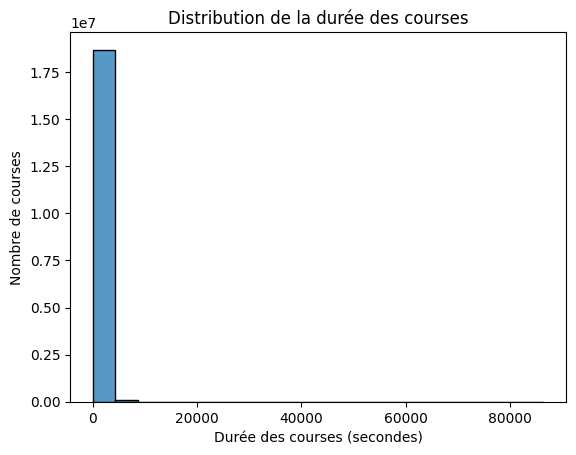

In [50]:
# Exemple de création d'un histogramme de la durée des courses
sns.histplot(df_duration_distance['duration_trip_seconds'], bins=20)
plt.xlabel('Durée des courses (secondes)')
plt.ylabel('Nombre de courses')
plt.title('Distribution de la durée des courses')
plt.show()

### Conversion de la durée en minutes

In [51]:
# Convertir cette moyenne des trip_seconds en minutes
mean_duration_minutes = mean_duration_seconds / 60

# Afficher la moyenne en minutes
print(f"Moyenne des trip_seconds en minutes : {mean_duration_minutes:.2f}")

Moyenne des trip_seconds en minutes : 12.85


## Exploration des paiements et pourboires

Même remarque que précédemment, inutile de créer l'instance du client BigQuery si déjà fait au-dessus, sinon, ajouter : client = bigquery.Client().

In [52]:
# Écrire une requête SQL pour extraire les données pertinentes de la table dans BigQuery
query = """
SELECT
  payment_type AS payment_type,
  tips AS tips
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips` TABLESAMPLE SYSTEM (10 PERCENT)
WHERE
  payment_type IS NOT NULL
  AND tips IS NOT NULL
"""

In [53]:
# Exécuter la requête dans BigQuery et récupérer les résultats
query_job = client.query(query)
results = query_job.result()

In [54]:
# Créer un DataFrame (attention, l'attente est longue donc j'ajoute un LIMIT 1000000 !)
df_payment_tips = pd.DataFrame(results, columns=['results'])

# Limiter le nombre de lignes affichées à 10
pd.set_option('display.max_rows', 10)

# Afficher le DataFrame avec les noms de colonnes personnalisés
df_payment_tips.head()

,results
0,"(Mobile, 2.6)"
1,"(Mobile, 2.07)"
2,"(Mobile, 2.4)"
3,"(Credit Card, 1.4)"
4,"(Credit Card, 7.2)"


In [55]:
# Créer deux nouvelles colonnes à partir des valeurs existantes
df_payment_tips['payment_type'] = df_payment_tips['results'].apply(lambda x: x[0])
df_payment_tips['tips'] = df_payment_tips['results'].apply(lambda x: x[1])

# Supprimer la colonne 'results' si vous ne voulez plus la conserver
df_payment_tips.drop(columns=['results'], inplace=True)

# Afficher le DataFrame mis à jour
df_payment_tips.head()

,payment_type,tips
0,Mobile,2.60
1,Mobile,2.07
2,Mobile,2.40
3,Credit Card,1.40
4,Credit Card,7.20


In [56]:
df_payment_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17808471 entries, 0 to 17808470
Data columns (total 2 columns):
 #   Column        Dtype  
---  ------        -----  
 0   payment_type  object 
 1   tips          float64
dtypes: float64(1), object(1)
memory usage: 271.7+ MB


In [57]:
df_payment_tips.describe()

,tips
count,1.780847e+07
mean,1.882662e+00
std,3.149740e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.400000e+00
max,5.655500e+02


In [58]:
# Calcul de la moyenne des des pourboires
avg_tip = df_payment_tips['tips'].mean()

print(f"Moyenne des pourboires : {avg_tip:.2f}")

Moyenne des pourboires : 1.88


In [59]:
# Comptage des occurrences de chaque type de paiement
payment_counts = df_payment_tips['payment_type'].value_counts()

print("Nombre d'occurrences de chaque type de paiement :")
print(payment_counts.to_string)

Nombre d'occurrences de chaque type de paiement :
<bound method Series.to_string of payment_type
Credit Card    8555292
Cash           8177178
Mobile          492769
Prcard          343388
Unknown         161190
No Charge        72213
Dispute           3746
Pcard             2117
Prepaid            562
Way2ride            16
Name: count, dtype: int64>


In [60]:
# Créer un graphique à barres des types de paiement (/!\ beaucoup trop long à s'afficher /!\)
# df_payment_tips.plot(kind='bar')
# plt.title('Répartition des types de paiement')
# plt.xlabel('Type de paiement')
# plt.ylabel("Nombre d'occurrences")
# plt.show()

## Top 10 des compagnies par tarif

In [27]:
# Écrire une requête SQL pour extraire les données pertinentes de la table dans BigQuery
query = """
SELECT company, SUM(fare) AS total_fares
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` TABLESAMPLE SYSTEM (10 PERCENT)
WHERE company IS NOT NULL
GROUP BY company
ORDER BY total_fares DESC
LIMIT 10
"""

In [28]:
# Exécuter la requête dans BigQuery et récupérer les résultats
query_job = client.query(query)
results = query_job.result()

In [29]:
# Créer un DataFrame (attention, l'attente est longue !)
df_fares = pd.DataFrame(results, columns=['results'])

# Limiter le nombre de lignes affichées à 10
pd.set_option('display.max_rows', 10)

# Afficher le DataFrame avec les noms de colonnes personnalisés
print(df_fares)

                                             results
0     (Taxi Affiliation Services, 64877684.78000046)
1                    (Flash Cab, 49154075.749999106)
2    (Dispatch Taxi Affiliation, 15931992.419999942)
3  (Chicago Elite Cab Corp. (Chicago Carriag, 132...
4                     (Sun Taxi, 12693815.070000034)
5                 (City Service, 11933718.259999972)
6  (Blue Ribbon Taxi Association Inc., 11000503.1...
7       (Choice Taxi Association, 9528296.119999949)
8     (Chicago Carriage Cab Corp, 9324127.920000006)
9              (Medallion Leasin, 8168168.710000003)


In [30]:
# Créer une nouvelle colonne à partir des valeurs existantes
df_fares['total_fares'] = df_fares['results'].apply(lambda x: x[0])

# Supprimer la colonne 'results' si vous ne voulez plus la conserver
df_fares.drop(columns=['results'], inplace=True)

# Afficher le DataFrame mis à jour
df_fares

,total_fares
0,Taxi Affiliation Services
1,Flash Cab
2,Dispatch Taxi Affiliation
3,Chicago Elite Cab Corp. (Chicago Carriag
4,Sun Taxi
5,City Service
6,Blue Ribbon Taxi Association Inc.
7,Choice Taxi Association
8,Chicago Carriage Cab Corp
9,Medallion Leasin


## Analyse de la géolocalisation

Utilisons les coordonnées de latitude et de longitude pour visualiser les trajets sur une carte. 

Identifions également les zones de prise en charge et de dépôt les plus fréquentes, ainsi que les itinéraires de course populaires.

In [11]:
# Écrire une requête SQL pour analyser la géolocalisation
query = """
SELECT
  pickup_latitude,
  pickup_longitude,
  dropoff_latitude,
  dropoff_longitude
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` TABLESAMPLE SYSTEM (10 PERCENT)
"""

In [12]:
# Exécuter la requête dans BigQuery et récupérer les résultats
query_job = client.query(query)
results = query_job.result()

In [13]:
# Créer un DataFrame (attention, l'attente est longue !)
df_geo = pd.DataFrame(results, columns=['results'])

# Limiter le nombre de lignes affichées à 10
pd.set_option('display.max_rows', 10)

# Afficher le DataFrame avec les noms de colonnes personnalisés
print(df_geo)

<bound method DataFrame.to_string of                                                     results
0         (41.909495669, -87.630963601, 41.942577185, -8...
1         (41.89830587, -87.653613982, 41.892507781, -87...
2         (42.009622881, -87.670166857, 42.009622881, -8...
3         (41.907520075, -87.6266589, 41.892507781, -87....
4         (41.879066994, -87.657005027, 41.89321636, -87...
...                                                     ...
18898341  (41.90749193, -87.63576009, 41.899155613, -87....
18898342  (41.90749193, -87.63576009, 41.88528132, -87.6...
18898343  (41.90749193, -87.63576009, 41.906025969, -87....
18898344  (41.90749193, -87.63576009, 41.914616286, -87....
18898345  (41.90749193, -87.63576009, 41.88528132, -87.6...

[18898346 rows x 1 columns]>


In [16]:
# Créer quatre nouvelles colonnes à partir des valeurs existantes
df_geo['pickup_latitude'] = df_geo['results'].apply(lambda x: x[0])
df_geo['pickup_longitude'] = df_geo['results'].apply(lambda x: x[1])
df_geo['dropoff_latitude'] = df_geo['results'].apply(lambda x: x[2])
df_geo['dropoff_longitude'] = df_geo['results'].apply(lambda x: x[3])

# Supprimer la colonne 'results' si vous ne voulez plus la conserver
df_geo.drop(columns=['results'], inplace=True)

# Afficher le DataFrame mis à jour
df_geo.head()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,41.909496,-87.630964,41.942577,-87.647079
1,41.898306,-87.653614,41.892508,-87.626215
2,42.009623,-87.670167,42.009623,-87.670167
3,41.907520,-87.626659,41.892508,-87.626215
4,41.879067,-87.657005,41.893216,-87.637844


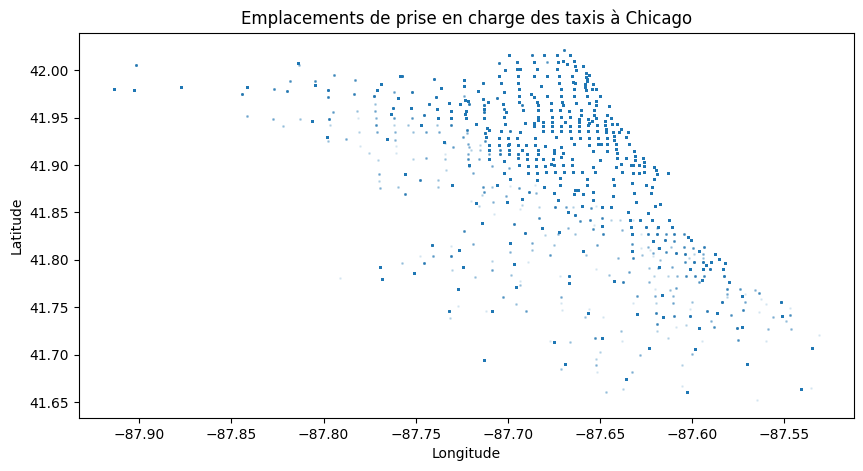

In [31]:
# Créer un graphique nuage de points pour afficher les emplacements de prise en charge
plt.figure(figsize = (10, 5))
plt.scatter(df_geo['pickup_longitude'], df_geo['pickup_latitude'], s = 1, alpha = 0.1)
plt.title('Emplacements de prise en charge des taxis à Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

## Analyse des lieux de prise en charge et de dépôt

Utilisons les coordonnées de latitude et de longitude pour visualiser les trajets sur une carte. 

Identifions les zones de prise en charge et de dépôt les plus fréquentes, ainsi que les itinéraires de course populaires.


### Prise en charge

In [41]:
# Écrire une requête SQL pour extraire les données pour analyser les lieux de prise en charge des taxis
query = """
SELECT pickup_community_area, COUNT(taxi_id) as trip_count
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE pickup_community_area IS NOT NULL
GROUP BY 1
ORDER BY trip_count DESC
LIMIT 10
"""

In [42]:
# Exécuter la requête dans BigQuery et récupérer les résultats
query_job = client.query(query)
results = query_job.result()

In [43]:
# Créer un DataFrame
df_prise = pd.DataFrame(results, columns=['results'])

# Limiter le nombre de lignes affichées à 10
pd.set_option('display.max_rows', 10)

# Afficher le DataFrame avec les noms de colonnes personnalisés
print(df_prise)

          results
0   (8, 59390462)
1  (32, 43092405)
2  (28, 17562310)
3  (76, 14283915)
4   (6, 10799073)
5    (7, 8330496)
6   (24, 5436498)
7   (33, 4780009)
8   (56, 3628941)
9    (3, 2867072)


In [44]:
# Créer deux nouvelles colonnes à partir des valeurs existantes
df_prise['pickup_community_area'] = df_prise['results'].apply(lambda x: x[0])
df_prise['trip_count'] = df_prise['results'].apply(lambda x: x[1])

# Supprimer la colonne 'results' si vous ne voulez plus la conserver
df_prise.drop(columns=['results'], inplace=True)

# Afficher le DataFrame mis à jour
df_prise

,pickup_community_area,trip_count
0,8,59390462
1,32,43092405
2,28,17562310
3,76,14283915
4,6,10799073
5,7,8330496
6,24,5436498
7,33,4780009
8,56,3628941
9,3,2867072


Le centre-ville, et notamment Near North Side, Loop, Near West Side, O'Hare et Lake View, est le lieu de prise en charge le plus courant pour les trajets en taxi. 

Nous pouvons supposer que cette partie de la ville possède une forte concentration d'entreprises, d'attractions touristiques et d'options de transport public.

### Dépôt

In [48]:
# Écrire une requête SQL pour extraire les données pour analyser les lieux de dépôt des taxis
query = """
SELECT dropoff_community_area, COUNT(taxi_id) AS trip_count
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE dropoff_community_area IS NOT NULL
GROUP BY 1
ORDER BY trip_count DESC
LIMIT 10
"""

In [49]:
# Exécuter la requête dans BigQuery et récupérer les résultats
query_job = client.query(query)
results = query_job.result()

In [50]:
# Créer un DataFrame
df_depot = pd.DataFrame(results, columns=['results'])

# Limiter le nombre de lignes affichées à 10
pd.set_option('display.max_rows', 10)

# Afficher le DataFrame avec les noms de colonnes personnalisés
print(df_depot)

          results
0   (8, 54081764)
1  (32, 36753237)
2  (28, 18677069)
3   (6, 11687187)
4   (7, 10603563)
5   (24, 7815179)
6   (76, 7519091)
7   (33, 5852861)
8    (3, 3447804)
9   (22, 3006641)


In [51]:
# Créer deux nouvelles colonnes à partir des valeurs existantes
df_depot['dropoff_community_area'] = df_depot['results'].apply(lambda x: x[0])
df_depot['trip_count'] = df_depot['results'].apply(lambda x: x[1])

# Supprimer la colonne 'results' si vous ne voulez plus la conserver
df_depot.drop(columns=['results'], inplace=True)

# Afficher le DataFrame mis à jour
df_depot

,dropoff_community_area,trip_count
0,8,54081764
1,32,36753237
2,28,18677069
3,6,11687187
4,7,10603563
5,24,7815179
6,76,7519091
7,33,5852861
8,3,3447804
9,22,3006641


Les lieux de dépose les plus courants pour les trajets en taxi sont, quant à eux, répartis plus uniformément entre Near North Side, Loop, Near West Side, Lake View et Lincoln Park. 

Nous pouvons supposer que ces quartiers sont des zones résidentielles populaires et que les gens prennent souvent le taxi pour rentrer chez eux après avoir voyagé dans d'autres quartiers de la ville.

## Etude des variations saisonnières

Recherchons des tendances saisonnières dans les courses de taxi. 

Par exemple, observons si le nombre de courses change en fonction des mois de l'année ou des jours de la semaine.

### Années et mois

In [119]:
# Écrire une requête SQL pour extraire les données pour analyser les variations saisonnières
query = """
SELECT
  EXTRACT(YEAR FROM trip_start_timestamp) AS annee,
  EXTRACT(MONTH FROM trip_start_timestamp) AS mois,
  COUNT(*) AS nombre_trajets
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY
  annee, mois
ORDER BY
  annee, mois
"""

In [120]:
# Exécuter la requête dans BigQuery et récupérer les résultats
query_job = client.query(query)
results = query_job.result()

In [121]:
# Créer un DataFrame
df_saison = pd.DataFrame(results, columns=['results'])

# Limiter le nombre de lignes affichées à 10
pd.set_option('display.max_rows', 10)

# Afficher le DataFrame avec les noms de colonnes personnalisés
print(df_saison)

                results
0    (2013, 1, 1589863)
1    (2013, 2, 1800259)
2    (2013, 3, 2261372)
3    (2013, 4, 2116665)
4    (2013, 5, 2260975)
..                  ...
124   (2023, 5, 592701)
125   (2023, 6, 625645)
126   (2023, 7, 548629)
127   (2023, 8, 553841)
128       (2023, 9, 46)

[129 rows x 1 columns]


In [122]:
# Créer trois nouvelles colonnes à partir des valeurs existantes
df_saison['annee'] = df_saison['results'].apply(lambda x: x[0])
df_saison['mois'] = df_saison['results'].apply(lambda x: x[1])
df_saison['nombre_trajets'] = df_saison['results'].apply(lambda x: x[2])

# Supprimer la colonne 'results' si vous ne voulez plus la conserver
df_saison.drop(columns=['results'], inplace=True)

# Afficher le DataFrame mis à jour
df_saison

,annee,mois,nombre_trajets
0,2013,1,1589863
1,2013,2,1800259
2,2013,3,2261372
3,2013,4,2116665
4,2013,5,2260975
...,...,...,...
124,2023,5,592701
125,2023,6,625645
126,2023,7,548629
127,2023,8,553841


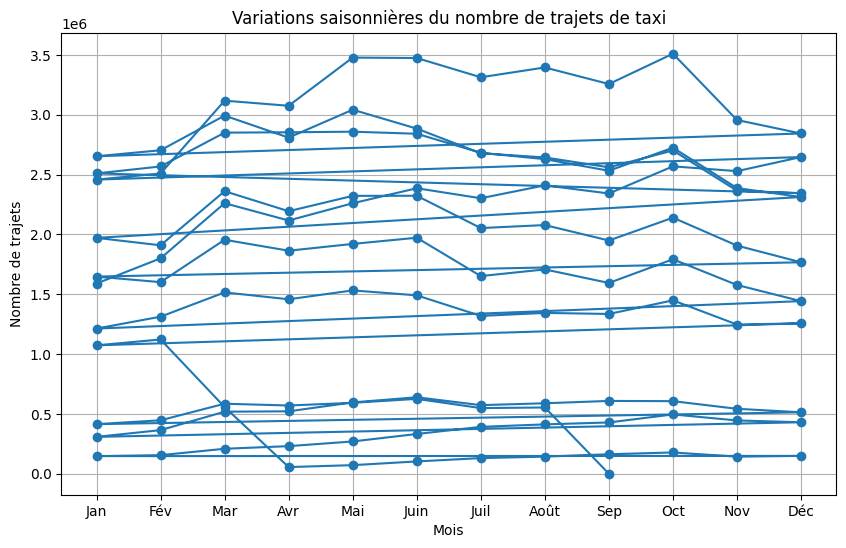

In [123]:
# Créer un graphique pour afficher les variations saisonnières du nombre de trajets
plt.figure(figsize=(10, 6))
plt.plot(df_saison['mois'], df_saison['nombre_trajets'], marker='o', linestyle='-')
plt.title('Variations saisonnières du nombre de trajets de taxi')
plt.xlabel('Mois')
plt.ylabel('Nombre de trajets')
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.grid(True)
plt.show()

In [124]:
# Remplacer les valeurs numériques par les noms des mois
mois_mapping = {
    1: 'Janvier',
    2: 'Février',
    3: 'Mars',
    4: 'Avril',
    5: 'Mai',
    6: 'Juin',
    7: 'Juillet',
    8: 'Août',
    9: 'Septembre',
    10: 'Octobre',
    11: 'Novembre',
    12: 'Décembre'
}

df_saison['mois'] = df_saison['mois'].replace(mois_mapping)

In [125]:
# Définir l'ordre des catégories pour les mois
mois_order = [
    'Janvier',
    'Février',
    'Mars',
    'Avril',
    'Mai',
    'Juin',
    'Juillet',
    'Août',
    'Septembre',
    'Octobre',
    'Novembre',
    'Décembre'
]

df_saison['mois'] = pd.Categorical(df_saison['mois'], categories=mois_order, ordered=True)

In [126]:
# Pivoter les données pour les préparer à la heatmap
heatmap_saison = df_saison.pivot(index='mois', columns='annee', values='nombre_trajets')
heatmap_saison

annee,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
mois,,,,,,,,,,,
Janvier,1589863.0,2458567.0,2653838.0,2510389.0,1971708.0,1647923.0,1213500.0,1073284.0,147188.0,308140.0,414457.0
Février,1800259.0,2509467.0,2703971.0,2568433.0,1909479.0,1601461.0,1312757.0,1122054.0,155231.0,364502.0,446724.0
Mars,2261372.0,3118544.0,2993546.0,2851106.0,2361634.0,1955754.0,1515751.0,557537.0,208614.0,518591.0,585160.0
Avril,2116665.0,3075724.0,2809624.0,2854290.0,2194344.0,1864255.0,1458320.0,55614.0,230547.0,521709.0,570241.0
Mai,2260975.0,3478527.0,3042894.0,2859147.0,2322631.0,1921103.0,1532311.0,71659.0,269765.0,596154.0,592701.0
...,...,...,...,...,...,...,...,...,...,...,...
Août,2410588.0,3395935.0,2643836.0,2629482.0,2078623.0,1707900.0,1344301.0,142876.0,412507.0,589012.0,553841.0
Septembre,2342636.0,3257520.0,2561267.0,2532650.0,1949427.0,1594697.0,1335454.0,162909.0,428594.0,608488.0,46.0
Octobre,2569438.0,3510853.0,2701977.0,2725340.0,2140326.0,1792681.0,1449378.0,177789.0,495634.0,606693.0,NaN


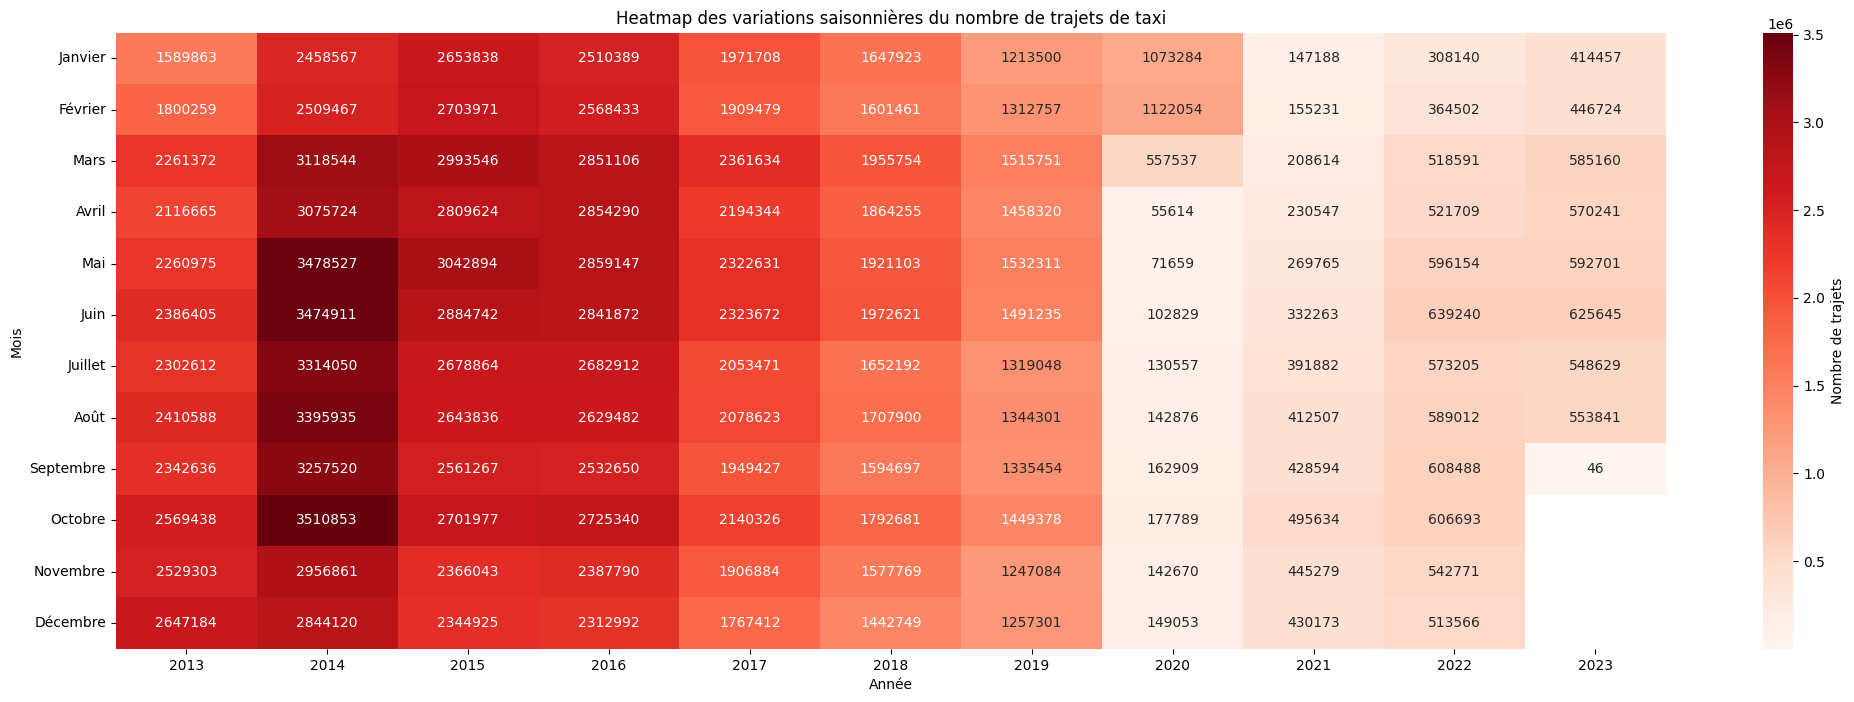

In [127]:
# Créer une heatmap
plt.figure(figsize=(25, 8))
sns.heatmap(heatmap_saison, cmap='Reds', annot=True, fmt='.0f', cbar_kws={'label': 'Nombre de trajets'})
plt.title('Heatmap des variations saisonnières du nombre de trajets de taxi')
plt.xlabel('Année')
plt.ylabel('Mois')
plt.show()

Les taxis ont été énormément empruntés en 2014.

On distingue une nette baisse démarrée au Printemps 2020, sûrement due au COVID. Ce qui est plus surprenant, c'est que les chiffres n'ont jamais repris les niveaux pré-2020. Est-ce dû à une réelle baisse, un changement des comportements ou le manque de récolte des données ?

### Jours de la semaine et heures

In [102]:
# Écrire une requête SQL pour extraire les données pour analyser les variations saisonnières
query = """
SELECT
  EXTRACT(DAYOFWEEK FROM trip_start_timestamp) AS jour_semaine,
  EXTRACT(HOUR FROM trip_start_timestamp) AS heure_jour,
  COUNT(*) AS nombre_trajets
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY
  jour_semaine, heure_jour
ORDER BY
  jour_semaine, heure_jour
"""

In [103]:
# Exécuter la requête dans BigQuery et récupérer les résultats
query_job = client.query(query)
results = query_job.result()

In [104]:
# Créer un DataFrame
df_jours = pd.DataFrame(results, columns=['results'])

# Limiter le nombre de lignes affichées à 10
pd.set_option('display.max_rows', 10)

# Afficher le DataFrame avec les noms de colonnes personnalisés
print(df_jours)

              results
0     (1, 0, 1918567)
1     (1, 1, 1855478)
2     (1, 2, 1615675)
3     (1, 3, 1298512)
4      (1, 4, 852170)
..                ...
163  (7, 19, 2006563)
164  (7, 20, 1861752)
165  (7, 21, 1716446)
166  (7, 22, 1831775)
167  (7, 23, 1935603)

[168 rows x 1 columns]


In [105]:
# Créer trois nouvelles colonnes à partir des valeurs existantes
df_jours['jour_semaine'] = df_jours['results'].apply(lambda x: x[0])
df_jours['heure_jour'] = df_jours['results'].apply(lambda x: x[1])
df_jours['nombre_trajets'] = df_jours['results'].apply(lambda x: x[2])

# Supprimer la colonne 'results' si vous ne voulez plus la conserver
df_jours.drop(columns=['results'], inplace=True)

# Afficher le DataFrame mis à jour
df_jours

,jour_semaine,heure_jour,nombre_trajets
0,1,0,1918567
1,1,1,1855478
2,1,2,1615675
3,1,3,1298512
4,1,4,852170
...,...,...,...
163,7,19,2006563
164,7,20,1861752
165,7,21,1716446
166,7,22,1831775


In [109]:
# Remplacer les valeurs numériques par les noms des jours de la semaine
jour_semaine_mapping = {
    1: 'Dimanche',
    2: 'Lundi',
    3: 'Mardi',
    4: 'Mercredi',
    5: 'Jeudi',
    6: 'Vendredi',
    7: 'Samedi'
}

df_jours['jour_semaine'] = df_jours['jour_semaine'].replace(jour_semaine_mapping)

In [110]:
# Définir l'ordre des catégories pour les jours de la semaine
jour_semaine_order = [
    'Dimanche',
    'Lundi',
    'Mardi',
    'Mercredi',
    'Jeudi',
    'Vendredi',
    'Samedi'
]

df_jours['jour_semaine'] = pd.Categorical(df_jours['jour_semaine'], categories=jour_semaine_order, ordered=True)

In [111]:
# Pivoter les données pour les préparer à la heatmap
heatmap_jours = df_jours.pivot(index='jour_semaine', columns='heure_jour', values='nombre_trajets')
heatmap_jours

heure_jour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
jour_semaine,,,,,,,,,,,,,,,,,,,,,
Dimanche,1918567,1855478,1615675,1298512,852170,528874,363474,370295,461896,648343,...,1140115,1177765,1219888,1242625,1255466,1207472,1081648,1000229,918806,786422
Lundi,608820,439037,310827,234059,247571,349664,537997,924013,1396282,1571125,...,1528502,1543736,1637243,1787408,1850759,1697521,1426599,1221466,1021134,761584
Mardi,527775,347270,227622,161198,162037,244313,463859,975673,1564933,1742767,...,1671530,1678327,1787601,1966397,2058639,1931504,1650420,1432225,1230976,909613
Mercredi,596941,383058,250165,177271,168529,242678,467346,992847,1586207,1762101,...,1728483,1731335,1846387,2024820,2137124,2040511,1774204,1559702,1366675,1033078
Jeudi,700248,469843,313134,221382,195158,255212,476168,1007958,1595852,1761310,...,1803783,1817656,1929207,2089816,2216322,2172018,1928194,1731460,1587395,1292290
Vendredi,952311,686088,477501,327683,259045,280380,469292,924734,1436748,1621237,...,1872890,1926340,2025218,2173536,2342283,2370330,2100438,1861781,1854897,1799745
Samedi,1671243,1590222,1363779,980669,573683,311234,271271,374109,552339,775827,...,1358379,1427772,1527287,1684027,1883917,2006563,1861752,1716446,1831775,1935603


In [112]:
# Créer une liste de toutes les heures possibles (0 à 23)
toutes_heures = list(range(24))

In [113]:
# Utiliser reindex pour réorganiser les colonnes du DataFrame
heatmap_jours = heatmap_jours.reindex(columns=toutes_heures)
heatmap_jours

heure_jour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
jour_semaine,,,,,,,,,,,,,,,,,,,,,
Dimanche,1918567,1855478,1615675,1298512,852170,528874,363474,370295,461896,648343,...,1140115,1177765,1219888,1242625,1255466,1207472,1081648,1000229,918806,786422
Lundi,608820,439037,310827,234059,247571,349664,537997,924013,1396282,1571125,...,1528502,1543736,1637243,1787408,1850759,1697521,1426599,1221466,1021134,761584
Mardi,527775,347270,227622,161198,162037,244313,463859,975673,1564933,1742767,...,1671530,1678327,1787601,1966397,2058639,1931504,1650420,1432225,1230976,909613
Mercredi,596941,383058,250165,177271,168529,242678,467346,992847,1586207,1762101,...,1728483,1731335,1846387,2024820,2137124,2040511,1774204,1559702,1366675,1033078
Jeudi,700248,469843,313134,221382,195158,255212,476168,1007958,1595852,1761310,...,1803783,1817656,1929207,2089816,2216322,2172018,1928194,1731460,1587395,1292290
Vendredi,952311,686088,477501,327683,259045,280380,469292,924734,1436748,1621237,...,1872890,1926340,2025218,2173536,2342283,2370330,2100438,1861781,1854897,1799745
Samedi,1671243,1590222,1363779,980669,573683,311234,271271,374109,552339,775827,...,1358379,1427772,1527287,1684027,1883917,2006563,1861752,1716446,1831775,1935603


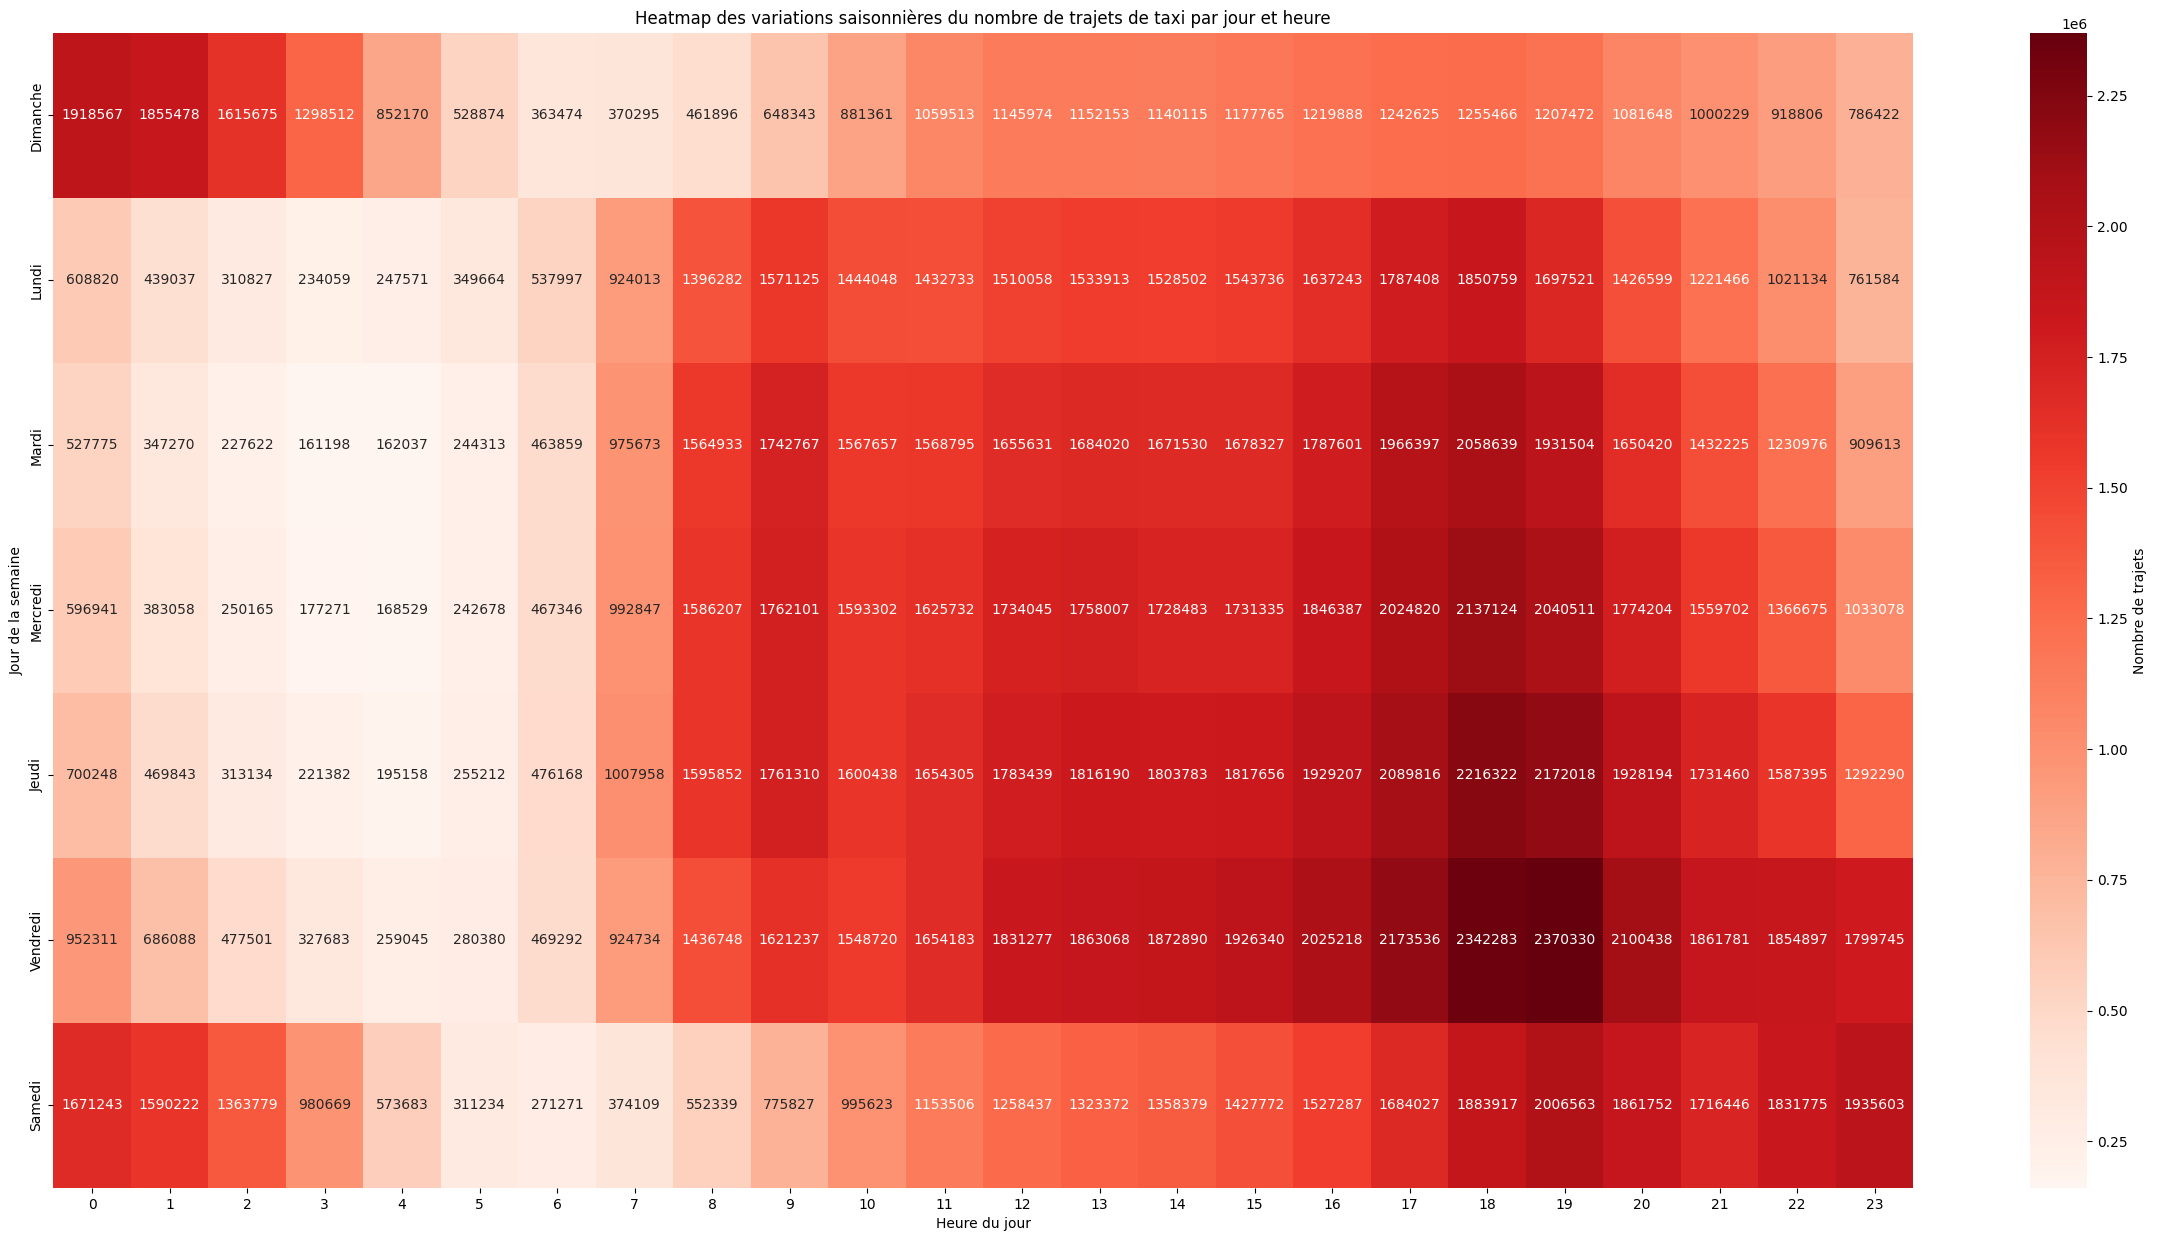

In [118]:
# Créer une heatmap avec le colormap "Reds"
plt.figure(figsize=(30, 15))
sns.heatmap(heatmap_jours, cmap='Reds', annot=True, fmt='.0f', cbar_kws={'label': 'Nombre de trajets'})
plt.title('Heatmap des variations saisonnières du nombre de trajets de taxi par jour et heure')
plt.xlabel('Heure du jour')
plt.ylabel('Jour de la semaine')
plt.show()

La visualisation qui en résulte peut fournir des informations sur les tendances de la demande de transport à Chicago, ce qui pourrait être utile pour programmer les chauffeurs de taxi ou anticiper les périodes de forte demande.

La répartition des taxis suit un schéma clair au cours de la semaine : 

- Pic de demande aux heures de pointe du matin et du soir en semaine, et répartition uniforme le week-end, avec une légère augmentation le soir.
- Les mois d'hiver, la demande de taxis est plus forte en fin de soirée en raison du froid et de la diminution de la durée du jour.
- Pendant les mois d'été, la demande de taxis diminue tôt le matin car les gens se rendent à leur destination à pied ou à vélo lorsqu'il fait chaud.

### Année, mois, jour et heure où les taxis sont les plus fréquentés

#### Année avec le plus de fréquentation

In [11]:
# Requête pour trouver l'année la plus fréquente
query_year = """
SELECT
  EXTRACT(YEAR FROM trip_start_timestamp) AS annee,
  COUNT(*) AS nombre_trajets
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY
  annee
ORDER BY
  nombre_trajets DESC
LIMIT 1
"""

In [14]:
# Exécuter la requête
query_job_year = client.query(query_year)
result_year = query_job_year.result()
most_frequent_year = list(result_year)[0]
print("Année avec le plus de fréquentation dans les taxis de Chicago :", most_frequent_year["annee"])

Année avec le plus de fréquentation dans les taxis de Chicago : 2014


#### Mois avec le plus de fréquentation

In [22]:
# Requête pour trouver le mois le plus fréquent
query_month = """
SELECT
  EXTRACT(MONTH FROM trip_start_timestamp) AS mois,
  COUNT(*) AS nombre_trajets
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY
  mois
ORDER BY
  nombre_trajets DESC
LIMIT 1
"""

In [24]:
# Exécuter la requête
query_job_month = client.query(query_month)
result_month = query_job_month.result()
most_frequent_month = list(result_month)[0]
mois_mapping = {
    1: 'Janvier',
    2: 'Février',
    3: 'Mars',
    4: 'Avril',
    5: 'Mai',
    6: 'Juin',
    7: 'Juillet',
    8: 'Août',
    9: 'Septembre',
    10: 'Octobre',
    11: 'Novembre',
    12: 'Décembre'
}
most_frequent_month = {
    "mois": mois_mapping[most_frequent_month["mois"]],
    "nombre_trajets": most_frequent_month["nombre_trajets"]
}
print("Mois avec le plus de fréquentation :", most_frequent_month)

Mois avec le plus de fréquentation : {'mois': 'Juin', 'nombre_trajets': 19075435}


#### Jour de la semaine avec le plus de fréquentation

In [27]:
# Requête pour trouver le jour de la semaine le plus fréquent
query_day_of_week = """
SELECT
  EXTRACT(DAYOFWEEK FROM trip_start_timestamp) AS jour_semaine,
  COUNT(*) AS nombre_trajets
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY
  jour_semaine
ORDER BY
  nombre_trajets DESC
LIMIT 1
"""

In [28]:
# Exécuter la requête
query_job_day_of_week = client.query(query_day_of_week)
result_day_of_week = query_job_day_of_week.result()
most_frequent_day_of_week = list(result_day_of_week)[0]
jour_semaine_mapping = {
    1: 'Dimanche',
    2: 'Lundi',
    3: 'Mardi',
    4: 'Mercredi',
    5: 'Jeudi',
    6: 'Vendredi',
    7: 'Samedi'
}
most_frequent_day_of_week = {
    "jour_semaine": jour_semaine_mapping[most_frequent_day_of_week["jour_semaine"]],
    "nombre_trajets": most_frequent_day_of_week["nombre_trajets"]
}
print("Jour de la semaine avec le plus de fréquentation :", most_frequent_day_of_week)

Jour de la semaine avec le plus de fréquentation : {'jour_semaine': 'Vendredi', 'nombre_trajets': 34659725}


#### Heure avec le plus de fréquentation

In [30]:
# Requête pour trouver l'heure la plus fréquente
query_hour = """
SELECT
  EXTRACT(HOUR FROM trip_start_timestamp) AS heure,
  COUNT(*) AS nombre_trajets
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY
  heure
ORDER BY
  nombre_trajets DESC
LIMIT 1
"""

In [31]:
# Exécuter la requête
query_job_hour = client.query(query_hour)
result_hour = query_job_hour.result()
most_frequent_hour = list(result_hour)[0]
print("Heure avec le plus de fréquentation :", most_frequent_hour["heure"])

Heure avec le plus de fréquentation : 18


## Segmentation des clients

Classons les passagers en différents groupes en fonction de leurs préférences de paiement, de leurs destinations fréquentes ou de leurs heures de course préférées.

In [32]:
# Requête pour compter le nombre de trajets par type de paiement
query_payment_segmentation = """
SELECT
  payment_type,
  COUNT(*) AS nombre_trajets
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY
  payment_type
ORDER BY
  nombre_trajets DESC
"""

In [34]:
# Exécuter la requête dans BigQuery et récupérer les résultats
query_job_payment_segmentation = client.query(query_payment_segmentation)
df_payment_segmentation = query_job_payment_segmentation.to_dataframe()
df_payment_segmentation

,payment_type,nombre_trajets
0,Cash,118205648
1,Credit Card,84640991
2,Mobile,2286746
3,Prcard,1974470
4,Unknown,1437211
5,No Charge,822277
6,Dispute,87874
7,Pcard,36874
8,Split,3442
9,Prepaid,1813


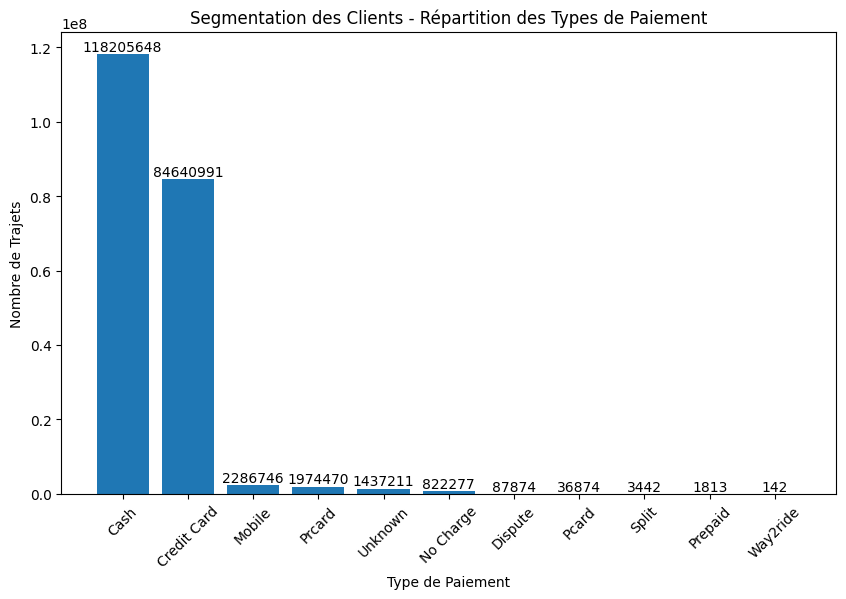

In [36]:
# Créer un graphique à barres pour la segmentation des clients avec des libellés
plt.figure(figsize=(10, 6))
bars = plt.bar(df_payment_segmentation["payment_type"], df_payment_segmentation["nombre_trajets"])
plt.xlabel("Type de Paiement")
plt.ylabel("Nombre de Trajets")
plt.title("Segmentation des Clients - Répartition des Types de Paiement")
plt.xticks(rotation=45)

# Ajouter des libellés au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 100,  # Ajuster la position verticale du libellé
        str(int(height)),  # Convertr la hauteur en chaîne
        ha="center",  # Aligner le texte au centre de la barre
        va="bottom"  # Positionner le texte au-dessus de la barre
    )

plt.show()

## Exploration des modes de paiement

Analysons les modes de paiement préférés des passagers et voyons s'il y a des variations en fonction de la région ou de la période de l'année.


### Exploration par région

Pour explorer les variations des modes de paiement en fonction de la région, avec une clause WHERE à la requête SQL pour filtrer les trajets en fonction de la région (par exemple, pickup_community_area ou dropoff_community_area).

In [41]:
# Requête pour compter le nombre de trajets par mode de paiement et par région
query_payment_by_region = """
SELECT
  payment_type,
  pickup_community_area,
  COUNT(*) AS nombre_trajets
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE
  pickup_community_area IS NOT NULL 
GROUP BY
  payment_type, pickup_community_area
ORDER BY
  pickup_community_area, nombre_trajets DESC
"""

In [44]:
# Exécuter la requête dans BigQuery et récupérez les résultats
query_job_payment_by_region = client.query(query_payment_by_region)
df_payment_by_region = query_job_payment_by_region.to_dataframe()
df_payment_by_region

,payment_type,pickup_community_area,nombre_trajets
0,Cash,1,630215
1,Credit Card,1,173706
2,Prcard,1,46079
3,Unknown,1,13971
4,Mobile,1,5642
...,...,...,...
720,Pcard,77,1444
721,Dispute,77,764
722,Prepaid,77,80
723,Split,77,8


### Exploration par période de l'année

Pour explorer les variations des modes de paiement en fonction de la période de l'année, avec une clause WHERE pour filtrer les trajets en fonction de la date/heure du trajet (par exemple, trip_start_timestamp).

Ici, tentons l'expérience avec les variations mensuelles.

In [51]:
# Mapping des mois avec l'ordre chronologique
mois_mapping = {
    'Janvier': 1,
    'Février': 2,
    'Mars': 3,
    'Avril': 4,
    'Mai': 5,
    'Juin': 6,
    'Juillet': 7,
    'Août': 8,
    'Septembre': 9,
    'Octobre': 10,
    'Novembre': 11,
    'Décembre': 12
}

In [52]:
# Requête pour compter le nombre de trajets par mode de paiement et par mois
query_payment_by_month = """
SELECT
  payment_type,
  CASE
    WHEN EXTRACT(MONTH FROM trip_start_timestamp) = 1 THEN 'Janvier'
    WHEN EXTRACT(MONTH FROM trip_start_timestamp) = 2 THEN 'Février'
    WHEN EXTRACT(MONTH FROM trip_start_timestamp) = 3 THEN 'Mars'
    WHEN EXTRACT(MONTH FROM trip_start_timestamp) = 4 THEN 'Avril'
    WHEN EXTRACT(MONTH FROM trip_start_timestamp) = 5 THEN 'Mai'
    WHEN EXTRACT(MONTH FROM trip_start_timestamp) = 6 THEN 'Juin'
    WHEN EXTRACT(MONTH FROM trip_start_timestamp) = 7 THEN 'Juillet'
    WHEN EXTRACT(MONTH FROM trip_start_timestamp) = 8 THEN 'Août'
    WHEN EXTRACT(MONTH FROM trip_start_timestamp) = 9 THEN 'Septembre'
    WHEN EXTRACT(MONTH FROM trip_start_timestamp) = 10 THEN 'Octobre'
    WHEN EXTRACT(MONTH FROM trip_start_timestamp) = 11 THEN 'Novembre'
    ELSE 'Décembre'
  END AS mois,
  COUNT(*) AS nombre_trajets
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE
  trip_start_timestamp IS NOT NULL  # Filtrer les trajets avec une date/heure de début définie
GROUP BY
  payment_type, mois
ORDER BY
  mois, nombre_trajets DESC
"""

In [53]:
# Exécuter la requête dans BigQuery et récupérez les résultats
query_job_payment_by_month = client.query(query_payment_by_month)
df_payment_by_month = query_job_payment_by_month.to_dataframe()
df_payment_by_month

,payment_type,mois,nombre_trajets
0,Cash,Août,10222442
1,Credit Card,Août,7063033
2,Mobile,Août,241190
3,Prcard,Août,182778
4,Unknown,Août,122672
...,...,...,...
116,No Charge,Septembre,63841
117,Dispute,Septembre,7061
118,Pcard,Septembre,2816
119,Split,Septembre,514


In [55]:
# Tri des mois dans l'ordre chronologique en utilisant le mapping
df_payment_by_month['mois'] = pd.Categorical(df_payment_by_month['mois'], categories=mois_mapping.keys(), ordered=True)
df_payment_by_month = df_payment_by_month.sort_values(by=['mois', 'payment_type'])
df_payment_by_month

,payment_type,mois,nombre_trajets
42,Cash,Janvier,9376800
43,Credit Card,Janvier,6134471
48,Dispute,Janvier,7523
45,Mobile,Janvier,130630
47,No Charge,Janvier,56361
...,...,...,...
23,Prcard,Décembre,165895
31,Prepaid,Décembre,99
29,Split,Décembre,426
25,Unknown,Décembre,114232


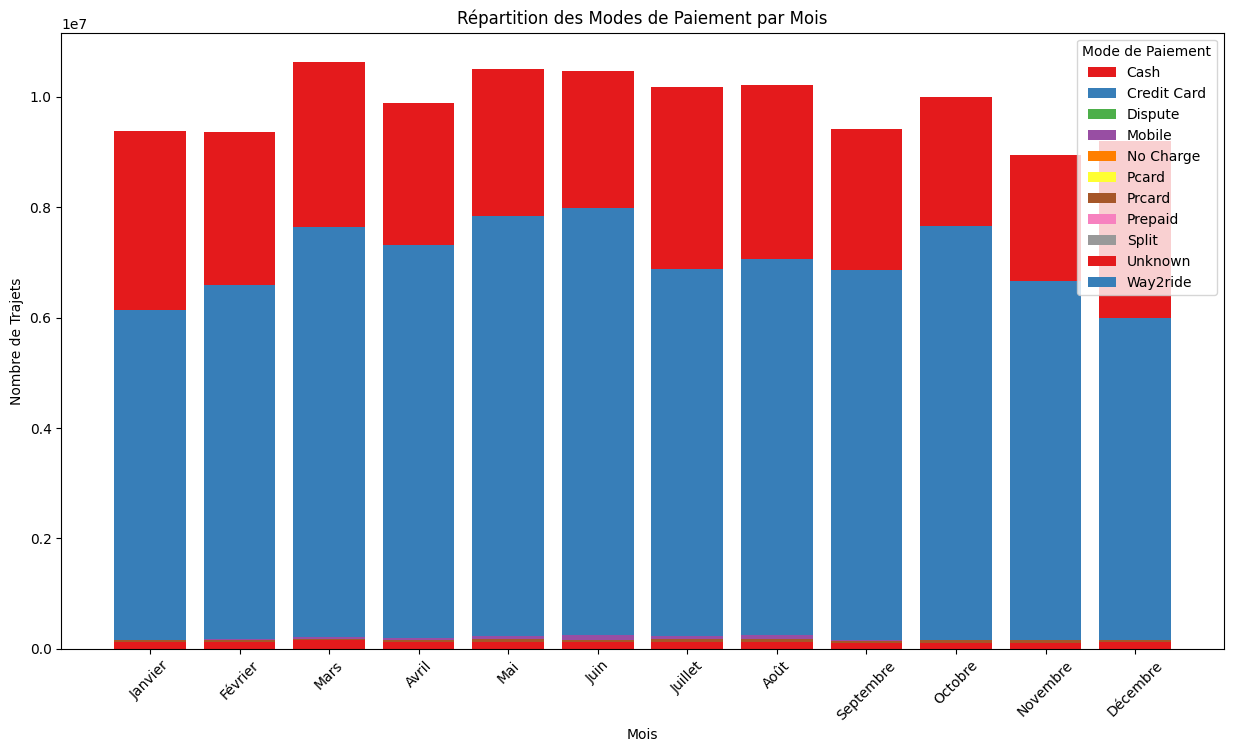

In [75]:
# Créer un graphique à barres pour la répartition des modes de paiement par mois
plt.figure(figsize=(15, 8))
colors = sns.color_palette('Set1', n_colors=len(df_payment_by_month['payment_type'].unique()))

for i, payment_type in enumerate(df_payment_by_month['payment_type'].unique()):
    data = df_payment_by_month[df_payment_by_month['payment_type'] == payment_type]
    plt.bar(data['mois'], data['nombre_trajets'], label=payment_type, color=colors[i])

plt.xlabel("Mois")
plt.ylabel("Nombre de Trajets")
plt.title("Répartition des Modes de Paiement par Mois")
plt.xticks(rotation=45)
plt.legend(title='Mode de Paiement')

plt.show()

## Analyse de la concurrence entre les entreprises de taxi

Comparons la performance des différentes entreprises en termes de nombre de courses, de recettes, de temps de course, etc.

### Nombre de trajets

In [76]:
# Requête pour compter le nombre de trajets par entreprise de taxi
query_company_trips = """
SELECT
  company,
  COUNT(*) AS nombre_trajets
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE
  company IS NOT NULL  # Filtrer les trajets avec une entreprise de taxi définie
GROUP BY
  company
ORDER BY
  nombre_trajets DESC
"""

In [77]:
# Exécuter la requête dans BigQuery et récupérer les résultats
query_job_company_trips = client.query(query_company_trips)
df_company_trips = query_job_company_trips.to_dataframe()

In [79]:
# Limiter le nombre d'entreprises à afficher pour plus de lisibilité (par exemple, les 10 premières)
top_companies = df_company_trips.head(10)
top_companies

,company,nombre_trajets
0,Taxi Affiliation Services,43759996
1,Flash Cab,21088336
2,Dispatch Taxi Affiliation,10429555
3,Blue Ribbon Taxi Association Inc.,10134928
4,Yellow Cab,10068857
5,Chicago Carriage Cab Corp,8036863
6,Choice Taxi Association,7983411
7,Sun Taxi,6577732
8,City Service,6547496
9,Chicago Elite Cab Corp. (Chicago Carriag,5263991


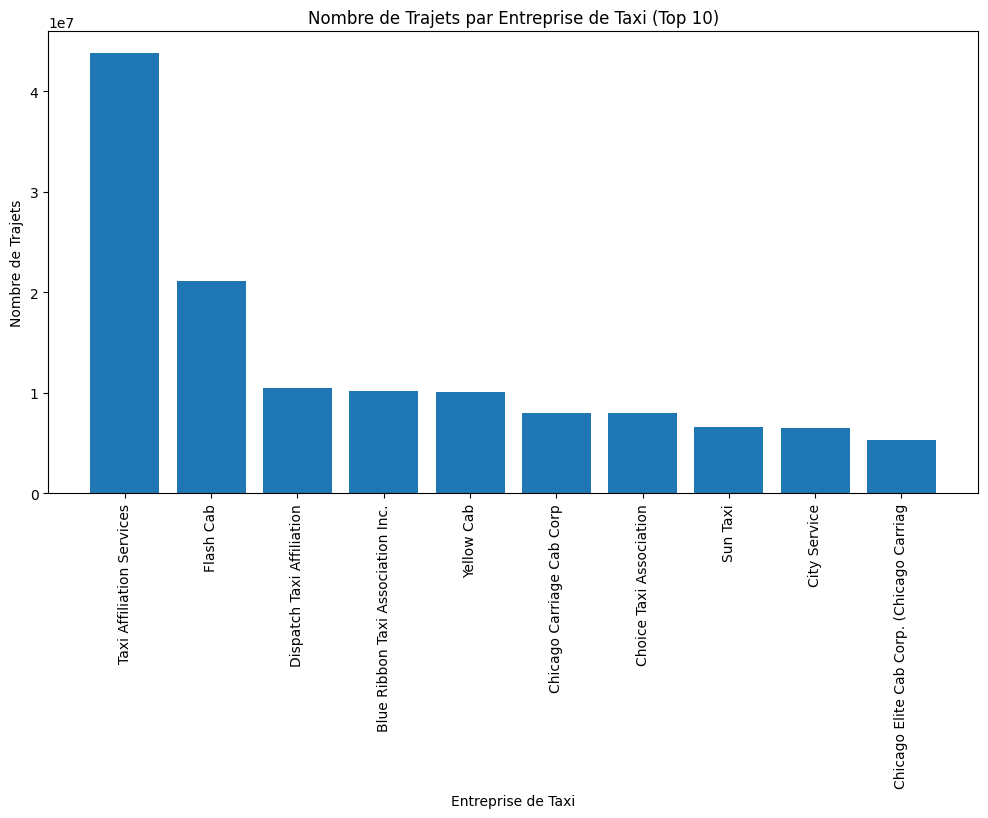

In [81]:
# Créer un graphique à barres pour afficher le nombre de trajets par entreprise
plt.figure(figsize=(12, 6))
plt.bar(top_companies['company'], top_companies['nombre_trajets'])
plt.xlabel("Entreprise de Taxi")
plt.ylabel("Nombre de Trajets")
plt.title("Nombre de Trajets par Entreprise de Taxi (Top 10)")
plt.xticks(rotation=90)

plt.show()

### Statistiques pour les 10 premières entreprises de taxi

Générer des statistiques et des graphiques pour les 10 premières entreprises de taxi en une seule fois.

Utiliser une boucle pour itérer à travers les noms des entreprises et enregistrer les résultats dans une structure de données, comme un dictionnaire.

In [82]:
# Requête pour obtenir les noms des 10 premières entreprises de taxi par nombre de trajets
query_top_companies = """
SELECT
  company,
  COUNT(*) AS nombre_trajets
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE
  company IS NOT NULL
GROUP BY
  company
ORDER BY
  nombre_trajets DESC
LIMIT 10
"""

In [84]:
# Exécuter la requête dans BigQuery et récupérez les résultats
query_job_top_companies = client.query(query_top_companies)
df_top_companies = query_job_top_companies.to_dataframe()
df_top_companies

,company,nombre_trajets
0,Taxi Affiliation Services,43759996
1,Flash Cab,21088336
2,Dispatch Taxi Affiliation,10429555
3,Blue Ribbon Taxi Association Inc.,10134928
4,Yellow Cab,10068857
5,Chicago Carriage Cab Corp,8036863
6,Choice Taxi Association,7983411
7,Sun Taxi,6577732
8,City Service,6547496
9,Chicago Elite Cab Corp. (Chicago Carriag,5263991


In [88]:
# Créer un dictionnaire pour stocker les données par entreprise
company_data = {}

# Itérer à travers les noms des entreprises et récupérer les données
for company_name in df_top_companies['company']:
    # Requête pour récupérer les données sur les trajets de l'entreprise spécifique
    query_company_data = f"""
    SELECT
      trip_seconds,
      trip_miles,
      fare,
      tips,
      tolls,
      extras,
      trip_total
    FROM
      `bigquery-public-data.chicago_taxi_trips.taxi_trips` TABLESAMPLE SYSTEM (10 PERCENT)
    WHERE
      company = '{company_name}'  # Filtrer les trajets par entreprise de taxi
    """
    
    # Exécuter la requête dans BigQuery et récupérer les résultats
    query_job_company_data = client.query(query_company_data)
    df_company_data = query_job_company_data.to_dataframe()
    
    # Stocker les données dans le dictionnaire avec le nom de l'entreprise comme clé
    company_data[company_name] = df_company_data

Statistiques descriptives pour Taxi Affiliation Services :

       trip_seconds    trip_miles          fare          tips         tolls  \
count     6127602.0  6.203001e+06  6.202964e+06  6.202964e+06  6.202964e+06   
mean      803.19369  1.969278e+00  1.314082e+01  1.250006e+00  5.663857e-04   
std      900.680707  8.992725e+00  1.528750e+01  2.695256e+00  1.338849e+00   
min             0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%           360.0  0.000000e+00  6.050000e+00  0.000000e+00  0.000000e+00   
50%           600.0  1.000000e-01  8.450000e+00  0.000000e+00  0.000000e+00   
75%           960.0  1.100000e+00  1.425000e+01  2.000000e+00  0.000000e+00   
max         86400.0  1.860000e+03  9.488110e+03  4.500000e+02  3.333330e+03   

             extras    trip_total  
count  6.202964e+06  6.202964e+06  
mean   1.335936e+00  1.572735e+01  
std    4.647519e+01  4.962056e+01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  7.000000e+00  
50%    0.000

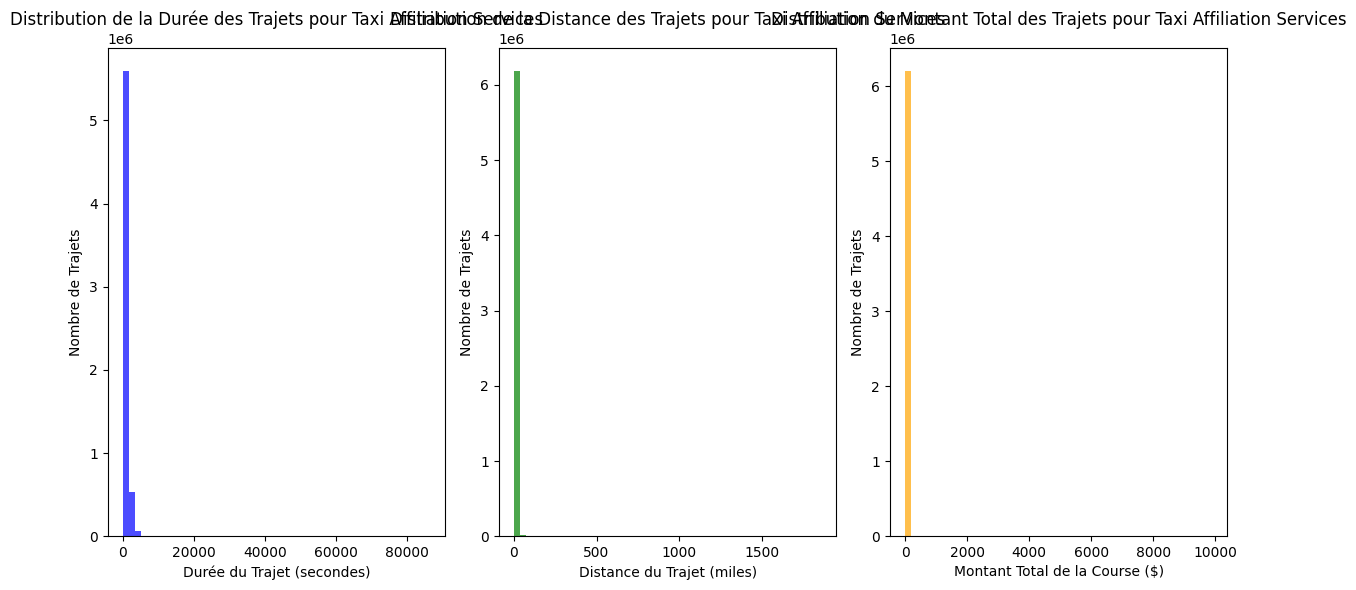

Statistiques descriptives pour Flash Cab :

       trip_seconds    trip_miles          fare          tips          tolls  \
count     2716357.0  2.716401e+06  2.716399e+06  2.716399e+06  732234.000000   
mean     889.903624  4.529631e+00  1.488070e+01  1.447073e+00       0.000050   
std     1249.298423  7.596820e+00  1.377311e+01  2.788243e+00       0.037588   
min             0.0  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%           352.0  9.000000e-01  6.250000e+00  0.000000e+00       0.000000   
50%           612.0  1.800000e+00  9.000000e+00  0.000000e+00       0.000000   
75%          1135.0  5.660000e+00  1.800000e+01  2.000000e+00       0.000000   
max         85554.0  3.188110e+03  1.834000e+03  5.555500e+02      32.000000   

             extras    trip_total  
count  2.716399e+06  2.716399e+06  
mean   9.158755e-01  1.728181e+01  
std    3.095502e+00  1.673124e+01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  7.250000e+00  
50%    0.000000e+00

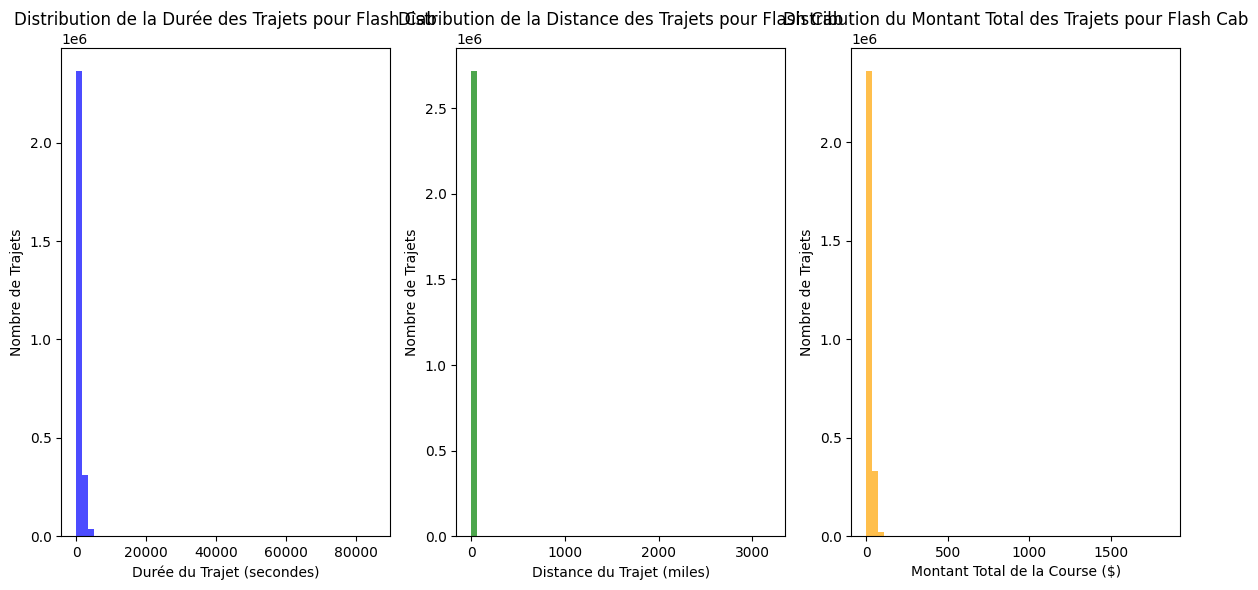

Statistiques descriptives pour Dispatch Taxi Affiliation :

       trip_seconds    trip_miles          fare          tips         tolls  \
count     1633376.0  1.633821e+06  1.633830e+06  1.633830e+06  1.633830e+06   
mean     760.817975  3.431136e+00  1.210297e+01  1.325351e+00  1.233557e-02   
std      704.961725  5.492806e+00  1.131232e+01  2.674407e+00  1.318983e+00   
min             0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%           360.0  7.000000e-01  6.000000e+00  0.000000e+00  0.000000e+00   
50%           540.0  1.400000e+00  7.850000e+00  0.000000e+00  0.000000e+00   
75%           900.0  3.400000e+00  1.250000e+01  2.000000e+00  0.000000e+00   
max         58440.0  3.387000e+02  2.481050e+03  7.750000e+02  9.180700e+02   

             extras    trip_total  
count  1.633830e+06  1.633830e+06  
mean   9.345390e-01  1.437519e+01  
std    3.079135e+00  1.430406e+01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  7.000000e+00  
50%    0.000

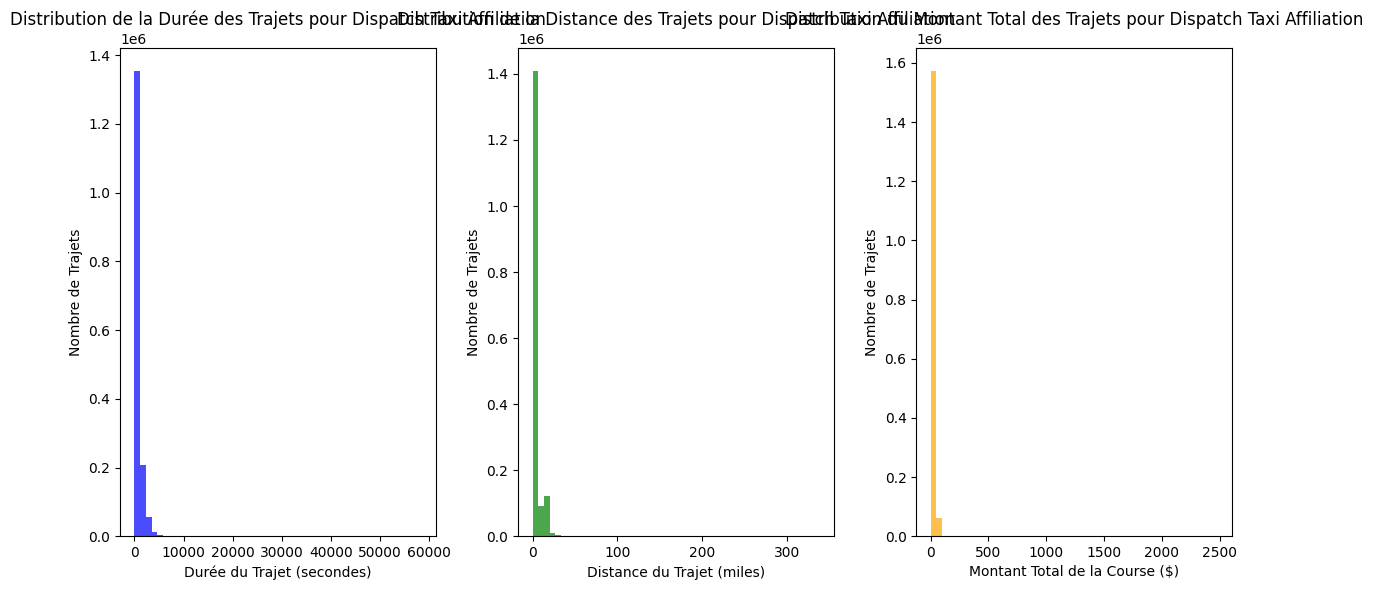

Statistiques descriptives pour Blue Ribbon Taxi Association Inc. :

       trip_seconds    trip_miles           fare           tips  \
count      866210.0  866451.00000  866449.000000  866449.000000   
mean     761.157087       0.14317      12.173555       1.433053   
std      755.046164       1.03743      20.430934       2.586221   
min             0.0       0.00000       0.000000       0.000000   
25%           360.0       0.00000       5.850000       0.000000   
50%           540.0       0.00000       7.750000       0.000000   
75%           900.0       0.00000      12.250000       2.000000   
max         65640.0     273.40000    9171.110000     168.000000   

               tolls         extras     trip_total  
count  866449.000000  866449.000000  866449.000000  
mean        0.000022       1.092227      14.698895  
std         0.018389      24.797723      33.175986  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       7.000000  
50%       

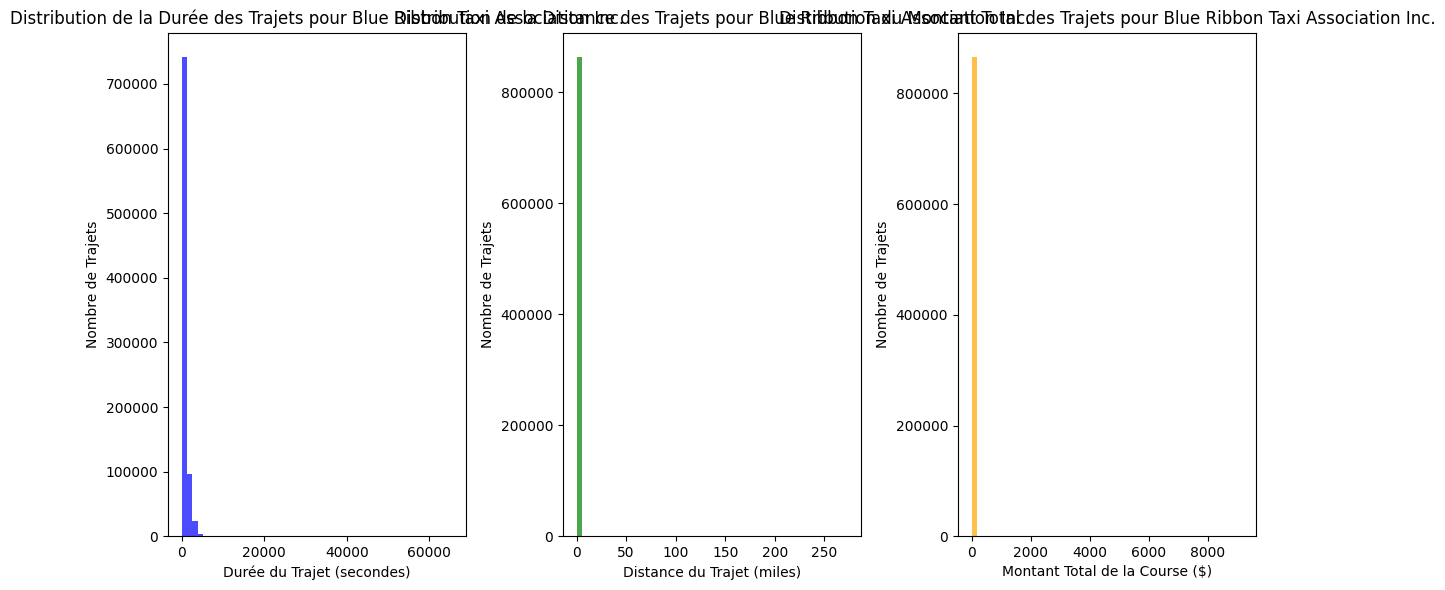

Statistiques descriptives pour Yellow Cab :

       trip_seconds  trip_miles        fare        tips  tolls      extras  \
count         484.0  484.000000  484.000000  484.000000    0.0  484.000000   
mean     777.404959    3.366942   12.291839    1.405331    NaN    1.290289   
std      860.896993    4.853781   11.901823    2.624618    NaN    5.839284   
min             0.0    0.000000    3.250000    0.000000    NaN    0.000000   
25%          293.75    0.700000    5.500000    0.000000    NaN    0.000000   
50%           524.0    1.600000    7.750000    0.000000    NaN    0.000000   
75%           937.5    3.525000   13.062500    2.000000    NaN    1.000000   
max          7580.0   32.100000   79.250000   24.350000    NaN   77.000000   

       trip_total  
count  484.000000  
mean    14.987459  
std     16.069060  
min      3.250000  
25%      6.750000  
50%      9.375000  
75%     15.507500  
max    146.100000  


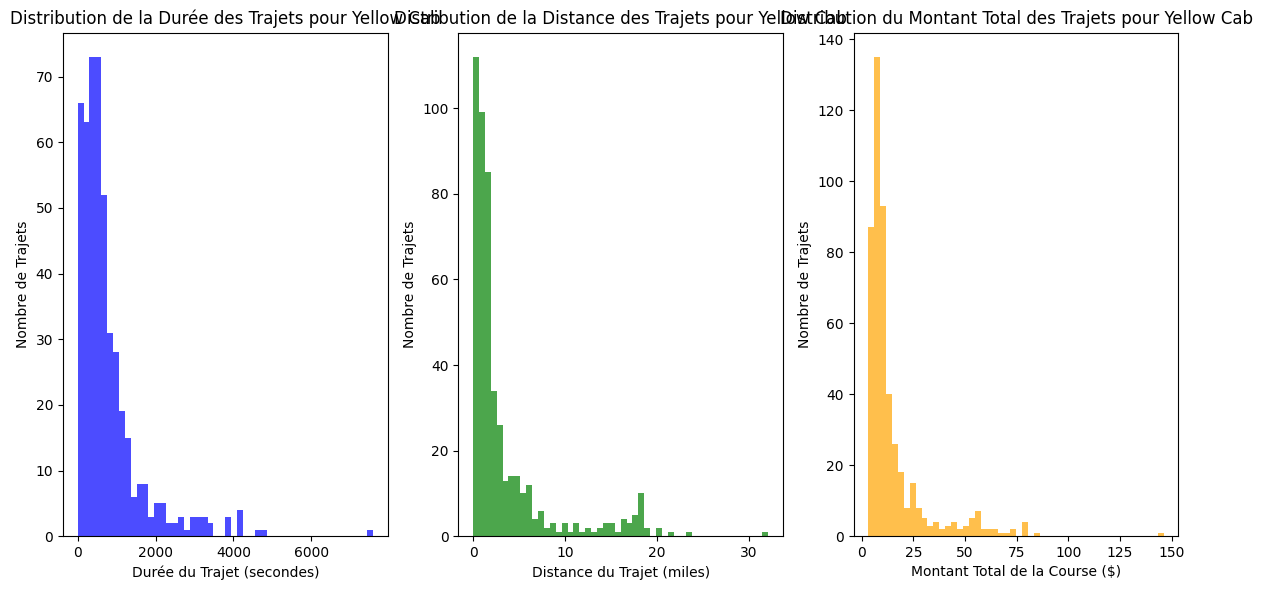

Statistiques descriptives pour Chicago Carriage Cab Corp :

       trip_seconds   trip_miles         fare         tips   tolls  \
count        3120.0  3121.000000  3119.000000  3119.000000  3119.0   
mean     891.107051     4.135524    13.759500     1.573270     0.0   
std     1778.923711     6.032172    13.429059     2.823463     0.0   
min             3.0     0.000000     0.000000     0.000000     0.0   
25%           373.0     0.950000     6.250000     0.000000     0.0   
50%           601.0     1.700000     8.500000     0.000000     0.0   
75%          1002.0     3.760000    13.750000     2.000000     0.0   
max         52688.0    77.700000   180.750000    36.250000     0.0   

            extras   trip_total  
count  3119.000000  3119.000000  
mean      1.407342    16.957009  
std       4.434370    17.284644  
min       0.000000     0.000000  
25%       0.000000     7.750000  
50%       0.000000    10.500000  
75%       1.000000    16.250000  
max      73.500000   217.500000  


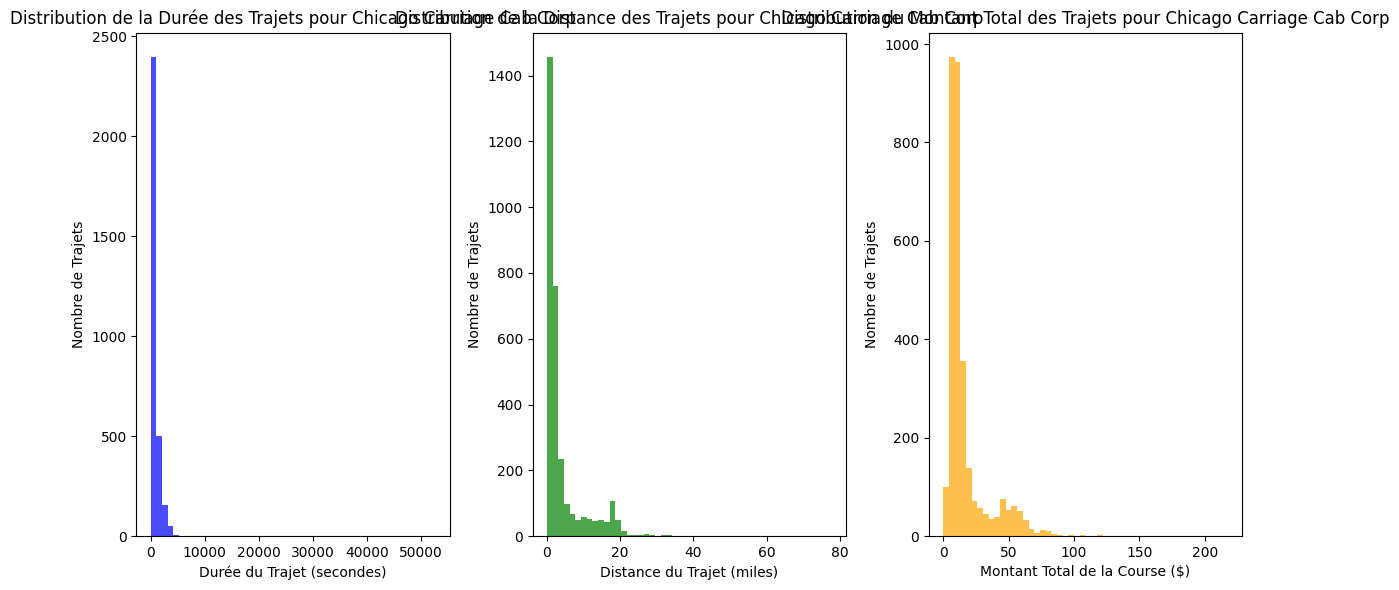

Statistiques descriptives pour Choice Taxi Association :

       trip_seconds     trip_miles           fare           tips  \
count      550997.0  551112.000000  551118.000000  551118.000000   
mean     779.024967       2.824134      12.510177       1.319632   
std      705.166255       4.912083      11.826668       2.749028   
min             0.0       0.000000       0.000000       0.000000   
25%           360.0       0.000000       6.000000       0.000000   
50%           540.0       1.100000       8.050000       0.000000   
75%           960.0       2.700000      13.050000       2.000000   
max         52860.0     335.500000     959.650000     719.710000   

               tolls         extras     trip_total  
count  551118.000000  551118.000000  551118.000000  
mean        0.009907       1.004196      14.843913  
std         1.681468       6.287018      16.018067  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       7.000000  
50%        

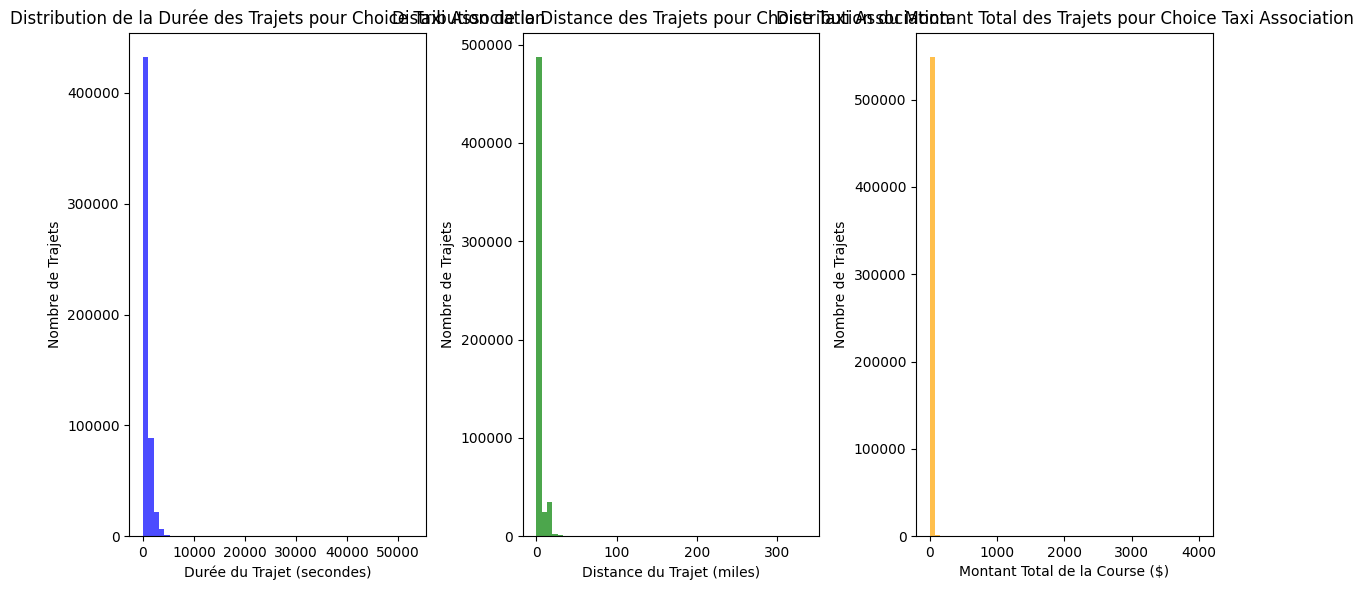

Statistiques descriptives pour Sun Taxi :

       trip_seconds     trip_miles           fare           tips  \
count      414996.0  415049.000000  415033.000000  415033.000000   
mean     955.902016       4.354225      14.572537       2.064662   
std     2107.342066       6.082999      14.670562       3.283684   
min             0.0       0.000000       0.000000       0.000000   
25%           360.0       0.900000       6.250000       0.000000   
50%           594.0       1.580000       8.250000       0.000000   
75%          1039.0       4.210000      14.750000       2.800000   
max         84571.0     349.100000     985.650000     200.000000   

               tolls         extras     trip_total  
count  415033.000000  415033.000000  415033.000000  
mean        0.000157       1.259758      18.146847  
std         0.069491       3.795838      18.940294  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       7.500000  
50%         0.000000      

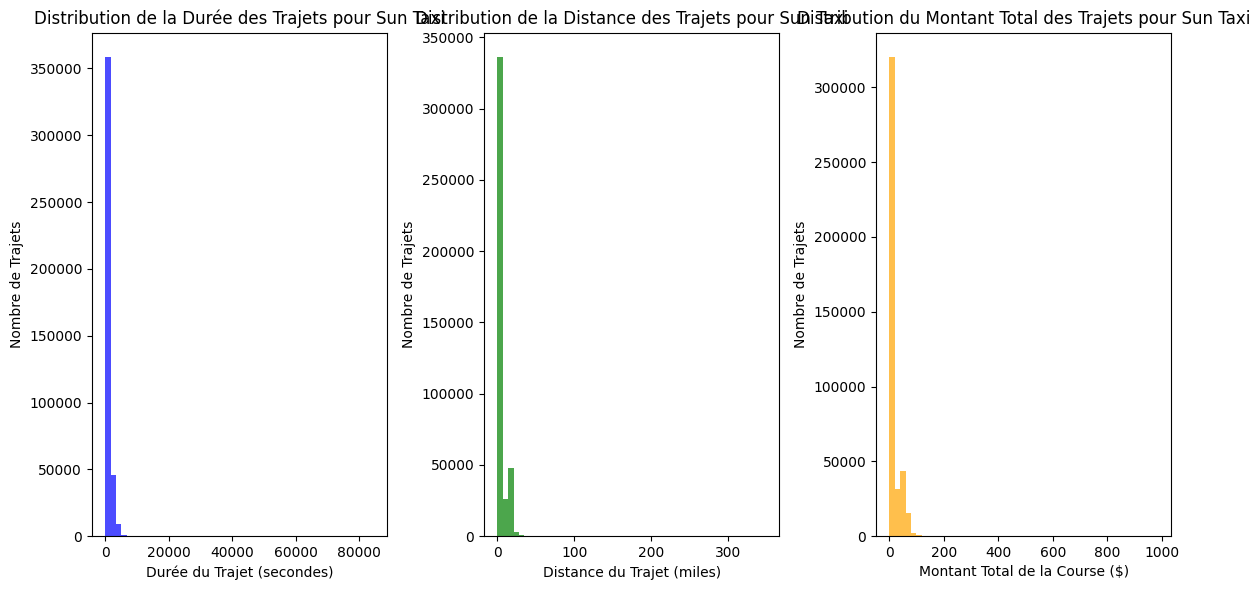

Statistiques descriptives pour City Service :

       trip_seconds     trip_miles           fare           tips  \
count      776579.0  776654.000000  775188.000000  775188.000000   
mean    1005.265957       5.303499      17.859743       2.422514   
std     1435.445975       6.763122      66.790288       3.649820   
min             0.0       0.000000       0.000000       0.000000   
25%           393.0       1.000000       6.500000       0.000000   
50%           660.0       2.000000       9.500000       1.000000   
75%          1282.0       7.600000      24.000000       3.000000   
max         86377.0     906.860000    9004.250000     120.000000   

               tolls         extras     trip_total  
count  775188.000000  775188.000000  775188.000000  
mean        0.010225       1.495704      22.037166  
std         0.485641       4.377529      68.136038  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       8.250000  
50%         0.000000  

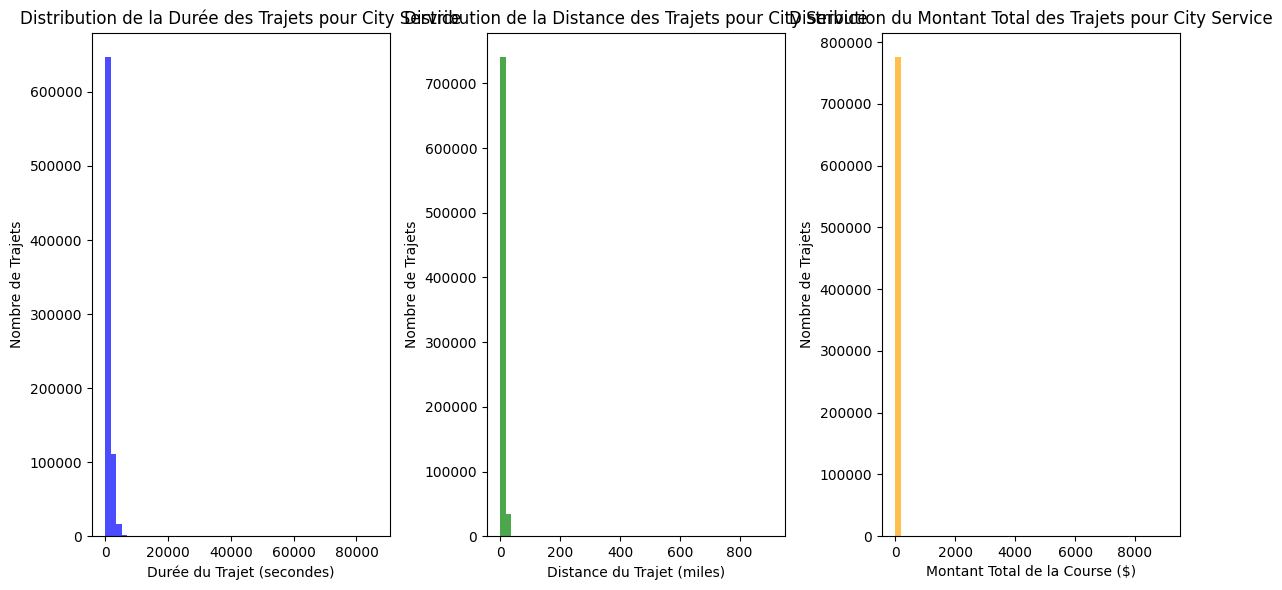

Statistiques descriptives pour Chicago Elite Cab Corp. (Chicago Carriag :

       trip_seconds  trip_miles           fare           tips     tolls  \
count      477893.0    481477.0  481477.000000  481477.000000  481477.0   
mean      45.557353         0.0      16.296929       3.021662       0.0   
std      354.656892         0.0      14.289126       3.029189       0.0   
min             0.0         0.0       0.000000       0.000000       0.0   
25%             0.0         0.0       7.050000       1.290000       0.0   
50%             0.0         0.0      10.150000       2.000000       0.0   
75%             0.0         0.0      21.050000       3.800000       0.0   
max         55740.0         0.0     608.500000      99.990000       0.0   

         extras     trip_total  
count  481477.0  481477.000000  
mean        0.0      19.318591  
std         0.0      16.626707  
min         0.0       0.000000  
25%         0.0       8.460000  
50%         0.0      12.060000  
75%         0.0   

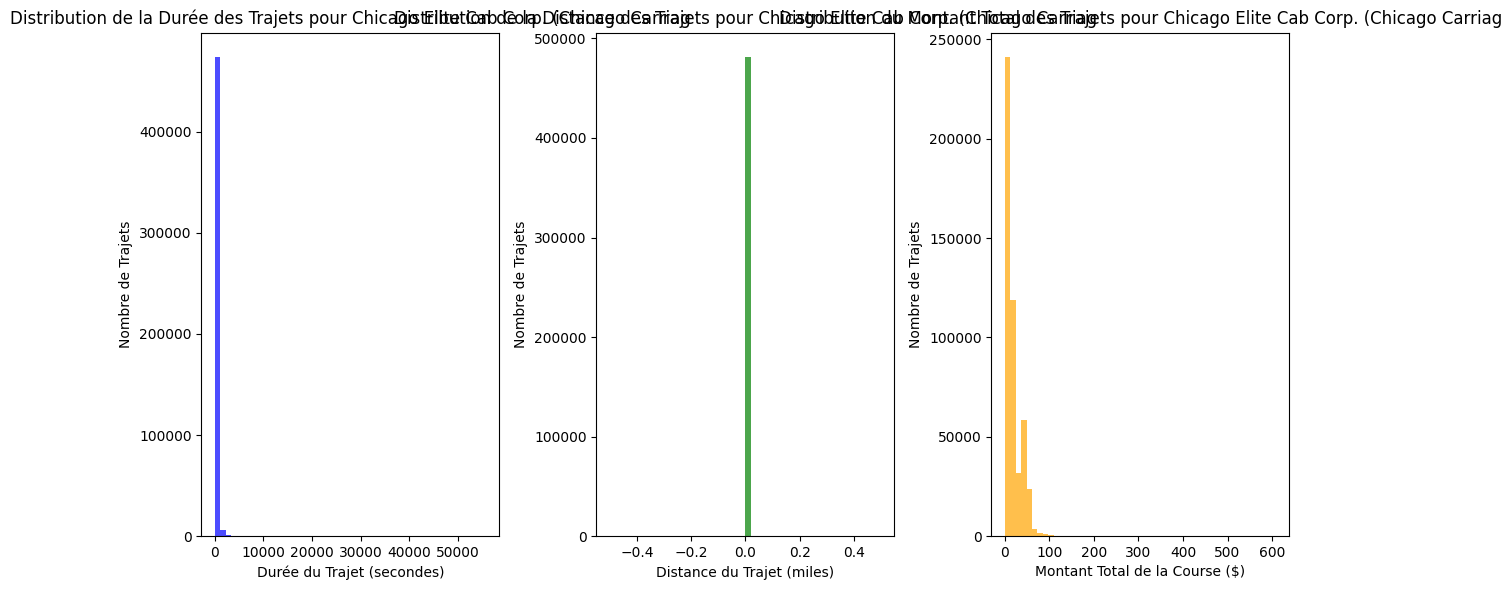

In [91]:
# Itérer à travers les clés du dictionnaire (noms des entreprises)
for company_name, company_data_df in company_data.items():
    # Générer des statistiques descriptives pour les données de l'entreprise
    print(f"Statistiques descriptives pour {company_name} :\n")
    print(company_data_df.describe())
    
    # Remplacer les valeurs manquantes par 0 (ou une autre valeur par défaut) pour les colonnes numériques
    company_data_df.fillna(0, inplace=True)  # Remplacer 0 par la valeur par défaut souhaitée
    
    # Créer des graphiques pour l'entreprise
    plt.figure(figsize=(12, 6))
    
    # Exemple : Histogramme de la durée du trajet
    plt.subplot(131)
    plt.hist(company_data_df['trip_seconds'], bins=50, color='blue', alpha=0.7)
    plt.xlabel("Durée du Trajet (secondes)")
    plt.ylabel("Nombre de Trajets")
    plt.title(f"Distribution de la Durée des Trajets pour {company_name}")
    
    # Exemple : Histogramme de la distance parcourue
    plt.subplot(132)
    plt.hist(company_data_df['trip_miles'], bins=50, color='green', alpha=0.7)
    plt.xlabel("Distance du Trajet (miles)")
    plt.ylabel("Nombre de Trajets")
    plt.title(f"Distribution de la Distance des Trajets pour {company_name}")
    
    # Exemple : Histogramme du montant total de la course
    plt.subplot(133)
    plt.hist(company_data_df['trip_total'], bins=50, color='orange', alpha=0.7)
    plt.xlabel("Montant Total de la Course ($)")
    plt.ylabel("Nombre de Trajets")
    plt.title(f"Distribution du Montant Total des Trajets pour {company_name}")
    
    plt.tight_layout()  # Pour éviter que les graphiques se chevauchent
    
    # Afficher les graphiques pour chaque entreprise
    plt.show()

## Étude des retards et des temps d'attente

In [11]:
# Requête pour obtenir les données sur les retards et les temps d'attente
query_delays = """
SELECT
  trip_start_timestamp,
  trip_end_timestamp,
  trip_seconds,
  trip_miles,
  fare,
  tips,
  tolls,
  extras,
  pickup_community_area,
  dropoff_community_area
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips` TABLESAMPLE SYSTEM (10 PERCENT)
WHERE
  trip_start_timestamp IS NOT NULL
  AND trip_end_timestamp IS NOT NULL
  AND trip_seconds > 0
  AND trip_miles > 0
"""

In [12]:
# Exécuter la requête dans BigQuery et récupérer les résultats
query_job_delays = client.query(query_delays)
df_delays = query_job_delays.to_dataframe()
df_delays.head(10)

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,pickup_community_area,dropoff_community_area
0,2016-12-08 23:00:00+00:00,2016-12-08 23:15:00+00:00,565,2.3,9.25,0.0,NaN,0.0,2,77
1,2016-12-05 13:45:00+00:00,2016-12-05 14:15:00+00:00,1592,8.6,25.50,0.0,NaN,0.0,5,32
2,2016-12-07 22:30:00+00:00,2016-12-07 22:30:00+00:00,539,2.7,10.00,0.0,NaN,0.0,27,28
3,2016-12-08 10:00:00+00:00,2016-12-08 10:15:00+00:00,923,4.3,14.25,0.0,NaN,0.0,5,13
4,2016-12-09 20:15:00+00:00,2016-12-09 20:30:00+00:00,1654,2.5,15.50,0.0,NaN,0.0,11,11
5,2016-12-17 11:00:00+00:00,2016-12-17 11:00:00+00:00,610,1.8,8.00,2.0,NaN,0.0,14,16
6,2016-12-20 07:30:00+00:00,2016-12-20 07:30:00+00:00,322,1.8,7.50,0.0,NaN,0.0,42,40
7,2016-12-19 21:45:00+00:00,2016-12-19 21:45:00+00:00,242,1.1,5.75,0.0,NaN,0.0,4,4
8,2016-12-18 09:45:00+00:00,2016-12-18 10:00:00+00:00,1189,7.9,23.00,0.0,NaN,0.0,1,7
9,2016-12-20 19:00:00+00:00,2016-12-20 19:00:00+00:00,341,0.9,6.00,0.0,NaN,0.0,5,6


# MACHINE LEARNING

### Prédiction du montant du tarif en fonction de caractéristiques telles que le lieu de prise en charge/dépose, la distance et l'heure de la journée

### Modèles de régression

Utilisons les caractéristiques des courses (heure de départ, distance, etc.) pour créer un modèle de prédiction des tarifs, lieux de prise en charge/dépôt, heure de la journée.

In [11]:
# Requête SQL
query = """
SELECT
    trip_seconds,
    trip_miles,
    pickup_community_area,
    dropoff_community_area,
    trip_start_timestamp
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`TABLESAMPLE SYSTEM (10 PERCENT)
WHERE
    trip_seconds IS NOT NULL
    AND trip_miles IS NOT NULL
    AND pickup_community_area IS NOT NULL
    AND dropoff_community_area IS NOT NULL
    AND trip_start_timestamp IS NOT NULL
"""


In [12]:
# Charger les données depuis BigQuery dans un DataFrame (df)
query_job_pred = client.query(query)
df_pred_course = query_job_pred.to_dataframe()
df_pred_course.head(10)

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,trip_start_timestamp
0,655,2.8,42,68,2015-08-16 09:45:00+00:00
1,3621,28.3,76,49,2015-08-17 06:45:00+00:00
2,1227,7.8,32,29,2015-08-14 21:30:00+00:00
3,1863,10.0,76,14,2015-08-09 12:00:00+00:00
4,2,0.0,59,59,2015-08-10 09:15:00+00:00
5,780,3.3,28,23,2015-08-07 20:30:00+00:00
6,852,9.3,56,35,2015-08-17 00:30:00+00:00
7,1069,4.8,8,34,2015-08-18 15:15:00+00:00
8,1020,5.3,32,60,2014-02-13 14:45:00+00:00
9,780,0.0,22,14,2014-03-11 20:00:00+00:00


#### Prétraitement des données

In [13]:
df_pred_course['trip_start_timestamp'] = pd.to_datetime(df_pred_course['trip_start_timestamp'])
df_pred_course['hour_of_day'] = df_pred_course['trip_start_timestamp'].dt.hour

In [14]:
df_pred_course.drop(columns=['trip_seconds'])

,trip_miles,pickup_community_area,dropoff_community_area,trip_start_timestamp,hour_of_day
0,2.80,42,68,2015-08-16 09:45:00+00:00,9
1,28.30,76,49,2015-08-17 06:45:00+00:00,6
2,7.80,32,29,2015-08-14 21:30:00+00:00,21
3,10.00,76,14,2015-08-09 12:00:00+00:00,12
4,0.00,59,59,2015-08-10 09:15:00+00:00,9
...,...,...,...,...,...
17198372,7.60,8,77,2014-11-10 00:15:00+00:00,0
17198373,1.10,3,77,2014-10-23 07:45:00+00:00,7
17198374,7.21,8,77,2016-09-06 20:30:00+00:00,20
17198375,0.70,77,77,2017-07-23 09:45:00+00:00,9


#### Préparation des données

In [15]:
X = df_pred_course[['trip_miles', 'pickup_community_area', 'dropoff_community_area', 'hour_of_day']]  # Caractéristiques
y = df_pred_course['trip_seconds']  # Cible

#### Division des données en jeu de données d'entraînement et de test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normaliser les caractéristiques

In [17]:
# Normaliser les caractéristiques (ceci est recommandé pour les régressions Ridge et LASSO)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Entraîner les modèles de régression et les évaluer - Régression linéaire

In [28]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

#### Prédictions sur le jeu de données de test

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

#### Évaluation du modèle

In [19]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Régression linéaire - MSE: {mse_linear}, R2: {r2_linear}")

Régression linéaire - MSE: 1203569.169121761, R2: 0.11430569467460117


#### Entraîner les modèles de régression et les évaluer - Régression Ridge

In [20]:
ridge_model = Ridge(alpha=1.0)  # Possible d'ajuster alpha selon les besoins
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

#### Prédictions sur le jeu de données de test

In [21]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

#### Évaluation du modèle

In [22]:
print(f"Régression Ridge - MSE: {mse_ridge}, R2: {r2_ridge}")

Régression Ridge - MSE: 1203569.168911341, R2: 0.11430569482944719


#### Entraîner les modèles de régression et les évaluer - Régression LASSO

In [23]:
lasso_model = Lasso(alpha=1.0)  # Possible d'ajuster alpha selon les besoins
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

#### Prédictions sur le jeu de données de test

In [24]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

#### Évaluation du modèle

In [25]:
print(f"Régression LASSO - MSE: {mse_lasso}, R2: {r2_lasso}")

Régression LASSO - MSE: 1203564.0156412658, R2: 0.11430948706846145


Les résultats obtenus pour les trois régressions montrent des valeurs similaires de MSE (Mean Squared Error) et de R2 (Coefficient de détermination) qui indiquent la qualité de l'ajustement des modèles aux données. Voici ce que ces métriques signifient :

MSE : Il mesure la moyenne des carrés des écarts entre les valeurs prédites et les valeurs réelles. Plus le MSE est bas, meilleure est la performance du modèle. Ici, les trois modèles ont des valeurs de MSE similaires, ce qui suggère que leur performance en termes d'ajustement des données est similaire.

R2 : Il représente la proportion de la variance totale de la variable dépendante qui est expliquée par le modèle. Un R2 plus élevé indique un meilleur ajustement. Cependant, ici, le R2 est très faible, ce qui suggère que les caractéristiques actuelles ne sont peut-être pas suffisantes pour expliquer la variance de la durée des courses.

Il est possible que les caractéristiques utilisées ne soient pas les plus appropriées pour prédire la durée des courses de taxi. Il est possible d'explorer d'autres caractéristiques ou de recueillir des données supplémentaires pour améliorer la performance des modèles.

#### Optimisation des hyperparamètres - Régression Ridge

In [27]:
# Définir les valeurs d'alpha à tester
alphas = [0.01, 0.1, 1, 10, 100]

In [28]:
# Créer un dictionnaire des hyperparamètres à optimiser
param_grid = {'alpha': alphas}

# Créer le modèle Ridge
ridge_model = Ridge()

In [29]:
# Utiliser GridSearchCV pour trouver la meilleure combinaison d'hyperparamètres
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [30]:
# Obtenir les meilleurs hyperparamètres
best_alpha = grid_search.best_params_['alpha']

In [31]:
# Créer un nouveau modèle Ridge avec le meilleur alpha
best_ridge_model = Ridge(alpha=best_alpha)

# Entraîner le modèle avec les meilleurs hyperparamètres
best_ridge_model.fit(X_train_scaled, y_train)

# Prédictions avec le modèle optimisé
y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)

# Évaluer le modèle
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

print(f"Meilleur modèle Ridge - MSE: {mse_best_ridge}, R2: {r2_best_ridge}")
print(f"Meilleur alpha trouvé : {best_alpha}")

Meilleur modèle Ridge - MSE: 1203569.1480804638, R2: 0.11430571015867796
Meilleur alpha trouvé : 100


L'optimisation des hyperparamètres peut aider à améliorer les performances de vos modèles en les ajustant de manière appropriée aux données. Ajuster les valeurs d'alpha en fonction de l'ensemble de données spécifique pour obtenir les meilleurs résultats.

Autres possibilités d'améliorations

Caractéristiques temporelles supplémentaires :
Ajouter des caractéristiques temporelles telles que le jour de la semaine, le mois, les jours fériés, etc. Ces caractéristiques peuvent avoir une influence sur la durée des courses.

Caractéristiques de trafic :
Intégrer des données de trafic en temps réel, telles que la densité du trafic, les conditions météorologiques et les incidents de la route, qui peuvent affecter la durée des courses.

Caractéristiques de localisation améliorées :
Utiliser des données de localisation plus précises, par exemple, la distance entre les coordonnées de prise en charge et de dépose réelles plutôt que les codes de communauté. Inclure aussi des caractéristiques liées à la densité de la population, aux attractions locales, etc.

Caractéristiques liées au trafic de taxi :
Explorer les données sur le volume de trafic de taxi dans différentes zones ou heures de la journée, ainsi que les caractéristiques spécifiques aux taxis tels que la compagnie de taxi.

Caractéristiques dérivées :
Créer des caractéristiques dérivées à partir des données existantes, telles que la vitesse moyenne en calculant "trip_miles" / "trip_seconds" ou la densité de circulation en calculant "trip_miles" / "trip_seconds" pour tenir compte de la vitesse moyenne.

Élimination des données aberrantes :
Identifier et gérer les valeurs aberrantes dans les données, car elles peuvent avoir un impact significatif sur les performances des modèles.

Ensemble de modèles :
Envisagez d'utiliser des méthodes d'ensemble telles que les forêts aléatoires ou les méthodes de gradient boosting pour améliorer la robustesse de votre modèle.

Validation croisée :
Utiliser la validation croisée pour évaluer la stabilité de vos modèles et leur capacité à généraliser sur de nouvelles données.

Collecte de données supplémentaires :
Si possible, recueillir des données supplémentaires qui pourraient être pertinentes pour la prédiction de la durée des courses, comme les événements spéciaux ou les fermetures de routes planifiées.

### Prédiction sur les passagers susceptibles de donner un pourboire

### Modèles de classification

In [33]:
# Requête SQL pour extraire les données échantillonnées
query = """
SELECT
    trip_start_timestamp,
    trip_seconds,
    trip_miles,
    fare,
    pickup_community_area,
    dropoff_community_area,
    tips,
    IF(tips > 0, 1, 0) AS tip_given
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips` TABLESAMPLE SYSTEM (10 PERCENT)
"""

In [34]:
# Exécuter la requête et récupérer les données
df_tips = client.query(query).to_dataframe()
df_tips.head(10)

,trip_start_timestamp,trip_seconds,trip_miles,fare,pickup_community_area,dropoff_community_area,tips,tip_given
0,2016-12-14 21:15:00+00:00,1020,9.10,24.75,32,<NA>,4.95,1
1,2016-12-15 18:00:00+00:00,1440,5.30,17.50,32,7,3.45,1
2,2016-12-12 20:45:00+00:00,2431,34.08,81.00,56,<NA>,12.00,1
3,2016-12-16 07:30:00+00:00,2760,17.30,43.00,76,8,8.60,1
4,2016-12-13 06:00:00+00:00,255,2.79,9.50,7,8,6.00,1
5,2016-12-16 18:15:00+00:00,2160,6.00,20.50,32,5,4.10,1
6,2016-12-12 23:15:00+00:00,780,5.30,16.00,32,7,3.20,1
7,2016-12-17 22:15:00+00:00,960,3.89,13.25,8,6,2.75,1
8,2016-12-16 21:00:00+00:00,1020,6.30,18.50,32,6,4.62,1
9,2016-12-14 12:45:00+00:00,2128,17.86,44.75,28,76,9.45,1


#### Prétraitement des données

In [35]:
# Supprimer les lignes avec des valeurs nulles ou négatives
df_tips = df_tips.dropna()
df_tips = df_tips[df_tips['trip_seconds'] > 0]
df_tips = df_tips[df_tips['trip_miles'] > 0]
df_tips = df_tips[df_tips['fare'] > 0]

#### Préparation des données

In [36]:
# Diviser les données en caractéristiques (X) et cible (y)
X = df_tips[['trip_seconds', 'trip_miles', 'fare', 'pickup_community_area', 'dropoff_community_area']]
y = df_tips['tip_given']

#### Diviser les données en ensembles d'entraînement et de test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normaliser les caractéristiques

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Créer et entraîner les modèles de classification - Régression logistique

In [39]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print("Régression logistique - Accuracy:", accuracy_logistic)
print("Matrice de confusion :\n", confusion_matrix_logistic)

Régression logistique - Accuracy: 0.6257185954835088
Matrice de confusion :
 [[1808790  121656]
 [1056705  161178]]


#### Créer et entraîner les modèles de classification - Arbres de décision

In [40]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

print("Arbres de décision - Accuracy:", accuracy_decision_tree)
print("Matrice de confusion :\n", confusion_matrix_decision_tree)

Arbres de décision - Accuracy: 0.6236085872855093
Matrice de confusion :
 [[1548245  382201]
 [ 802803  415080]]


#### Créer et entraîner les modèles de classification - Forêts aléatoires

In [41]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
y_pred_random_forest = random_forest_model.predict(X_test_scaled)

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

print("Forêts aléatoires - Accuracy:", accuracy_random_forest)
print("Matrice de confusion :\n", confusion_matrix_random_forest)

Forêts aléatoires - Accuracy: 0.6366269217734233
Matrice de confusion :
 [[1558400  372046]
 [ 771972  445911]]


Les résultats obtenus sont basés sur l'évaluation de trois modèles de classification (Régression logistique, Arbres de décision et Forêts aléatoires) pour prédire si un passager est susceptible de donner un pourboire en fonction de caractéristiques telles que la distance, le montant du billet et le lieu de prise en charge/dépose. Voici ce que signifient ces résultats :

Régression logistique :

Accuracy (Précision) : L'accuracy est la proportion de prédictions correctes par rapport à l'ensemble de test. Dans ce cas, la régression logistique a une précision d'environ 62.57 %, ce qui signifie qu'elle prédit correctement si un passager donne ou non un pourboire dans environ 62.57 % des cas.
Matrice de confusion : La matrice de confusion montre le nombre de prédictions correctes et incorrectes pour chaque classe (donner un pourboire ou ne pas donner un pourboire). Elle indique qu'il y a environ 1,808,790 prédictions correctes de la classe "ne pas donner de pourboire" et environ 161,178 prédictions correctes de la classe "donner un pourboire". Cependant, il y a environ 105,6705 prédictions incorrectes de la classe "ne pas donner de pourboire" et environ 121,656 prédictions incorrectes de la classe "donner un pourboire".

Arbres de décision :

Accuracy (Précision) : Les arbres de décision ont une précision d'environ 62.36 %, ce qui est similaire à la régression logistique.
Matrice de confusion : La matrice de confusion pour les arbres de décision indique environ 1,548,245 prédictions correctes de la classe "ne pas donner de pourboire" et environ 415,080 prédictions correctes de la classe "donner un pourboire". Cependant, il y a environ 802,803 prédictions incorrectes de la classe "ne pas donner de pourboire" et environ 382,201 prédictions incorrectes de la classe "donner un pourboire".

Forêts aléatoires :

Accuracy (Précision) : Les forêts aléatoires ont la meilleure précision parmi les trois modèles, avec environ 63.66 %.
Matrice de confusion : La matrice de confusion pour les forêts aléatoires indique environ 1,558,400 prédictions correctes de la classe "ne pas donner de pourboire" et environ 445,911 prédictions correctes de la classe "donner un pourboire". Cependant, il y a environ 771,972 prédictions incorrectes de la classe "ne pas donner de pourboire" et environ 372,046 prédictions incorrectes de la classe "donner un pourboire".

En résumé, les trois modèles ont des performances similaires en termes de précision, mais les forêts aléatoires ont légèrement surpassé les autres modèles. Cependant, il est important de noter que l'accuracy seule ne donne pas une image complète de la performance du modèle, et d'autres métriques telles que la sensibilité (recall), la spécificité, la F1-score, etc., peuvent être utiles pour une évaluation plus approfondie en fonction des besoins spécifiques du problème.

### Approfondissement de l'évaluation

#### Spécificité

In [45]:
# Calcul de la spécificité à partir de la matrice de confusion
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

In [46]:
# Régression logistique
specificity_logistic = specificity_score(y_test, y_pred_logistic)
print("Régression logistique - Spécificité:", specificity_logistic)

# Arbres de décision
specificity_decision_tree = specificity_score(y_test, y_pred_decision_tree)
print("Arbres de décision - Spécificité:", specificity_decision_tree)

# Forêts aléatoires
specificity_random_forest = specificity_score(y_test, y_pred_random_forest)
print("Forêts aléatoires - Spécificité:", specificity_random_forest)

Régression logistique - Spécificité: 0.9369803661951694
Arbres de décision - Spécificité: 0.8020141459538366
Forêts aléatoires - Spécificité: 0.8072745883593739


#### Recall

In [47]:
# Régression logistique
recall_logistic = recall_score(y_test, y_pred_logistic)

print("Régression logistique - Recall:", recall_logistic)

# Arbres de décision
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)

print("Arbres de décision - Recall:", recall_decision_tree)

# Forêts aléatoires
recall_random_forest = recall_score(y_test, y_pred_random_forest)

print("Forêts aléatoires - Recall:", recall_random_forest)

Régression logistique - Recall: 0.1323427619894522
Arbres de décision - Recall: 0.340820916294915
Forêts aléatoires - Recall: 0.36613615593616133


#### F-1 Score

In [48]:
# Régression logistique

f1_logistic = f1_score(y_test, y_pred_logistic)

print("Régression logistique - F1-score:", f1_logistic)
print("Classification Report pour Régression logistique:\n", classification_report(y_test, y_pred_logistic))

# Arbres de décision

f1_decision_tree = f1_score(y_test, y_pred_decision_tree)

print("Arbres de décision - F1-score:", f1_decision_tree)
print("Classification Report pour Arbres de décision:\n", classification_report(y_test, y_pred_decision_tree))

# Forêts aléatoires

f1_random_forest = f1_score(y_test, y_pred_random_forest)

print("Forêts aléatoires - F1-score:", f1_random_forest)
print("Classification Report pour Forêts aléatoires:\n", classification_report(y_test, y_pred_random_forest))

Régression logistique - F1-score: 0.21480132496666593
Classification Report pour Régression logistique:
               precision    recall  f1-score   support

         0.0       0.63      0.94      0.75   1930446
         1.0       0.57      0.13      0.21   1217883

    accuracy                           0.63   3148329
   macro avg       0.60      0.53      0.48   3148329
weighted avg       0.61      0.63      0.55   3148329

Arbres de décision - F1-score: 0.4119565454722296
Classification Report pour Arbres de décision:
               precision    recall  f1-score   support

         0.0       0.66      0.80      0.72   1930446
         1.0       0.52      0.34      0.41   1217883

    accuracy                           0.62   3148329
   macro avg       0.59      0.57      0.57   3148329
weighted avg       0.61      0.62      0.60   3148329

Forêts aléatoires - F1-score: 0.4380609478151524
Classification Report pour Forêts aléatoires:
               precision    recall  f1-score   s

Résultats : 

**Régression logistique :**

Spécificité : Environ 93.70 % des cas où un passager n'a pas donné de pourboire ont été correctement identifiés.
Recall : Seulement environ 13.23 % des cas où un passager a donné un pourboire ont été correctement identifiés.
F1-score : La combinaison de la précision et du rappel pour cette classe est faible, environ 21.48 %.

Classification Report : Le rapport de classification fournit une évaluation détaillée de la performance du modèle pour chaque classe. Il montre que le modèle a du mal à prédire la classe "donner un pourboire" (classe 1), car le rappel pour cette classe est très faible, ce qui signifie qu'il manque de nombreux cas positifs.

**Arbres de décision :**

Spécificité : Environ 80.20 % des cas où un passager n'a pas donné de pourboire ont été correctement identifiés.
Recall : Environ 34.08 % des cas où un passager a donné un pourboire ont été correctement identifiés.
F1-score : Le modèle d'arbres de décision a une F1-score d'environ 41.20 %, ce qui est meilleur que la régression logistique.

Classification Report : Le rapport de classification montre que le modèle d'arbres de décision a une performance légèrement meilleure que la régression logistique, mais il a encore du mal à prédire la classe "donner un pourboire" avec un rappel relativement faible.

**Forêts aléatoires :**

Spécificité : Environ 80.73 % des cas où un passager n'a pas donné de pourboire ont été correctement identifiés.
Recall : Environ 36.61 % des cas où un passager a donné un pourboire ont été correctement identifiés.
F1-score : Les forêts aléatoires ont le meilleur F1-score parmi les trois modèles, d'environ 43.81 %.

Classification Report : Le rapport de classification montre que les forêts aléatoires ont la meilleure performance globale, avec un rappel légèrement meilleur que les autres modèles pour la classe "donner un pourboire".

Dans l'ensemble, même si les forêts aléatoires ont la meilleure performance parmi les trois modèles, la tâche de prédire si un passager donnera un pourboire est difficile, car il y a un déséquilibre significatif entre les classes. Il est possible d'envisager des techniques de rééchantillonnage ou d'autres stratégies pour gérer ce déséquilibre si nécessaire.

#### Courbes ROC et AOC pour les Forêts aléatoires

In [52]:
# Courbe ROC et AUC pour les Forêts aléatoires
fpr, tpr, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test_scaled)[:,1])
roc_auc = roc_auc_score(y_test, y_pred_random_forest)

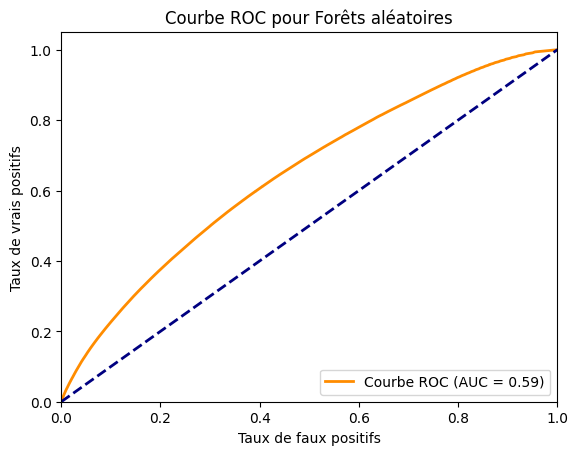

In [51]:
# Graphique
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour Forêts aléatoires')
plt.legend(loc="lower right")
plt.show()

L'AUC (Area Under the Curve) est une mesure couramment utilisée pour évaluer la performance d'un modèle de classification en analysant sa courbe ROC (Receiver Operating Characteristic). La courbe ROC est un graphique qui représente le taux de vrais positifs (TVP) en fonction du taux de faux positifs (TFP) pour différentes valeurs de seuil de classification.

L'AUC est la mesure de l'aire sous cette courbe ROC. L'AUC varie de 0 à 1, où une valeur de 0 signifie une mauvaise performance (le modèle prédit toujours incorrectement) et une valeur de 1 signifie une performance parfaite (le modèle prédit toujours correctement).

Ici, une valeur d'AUC de 0.59 signifie que la courbe ROC du modèle de forêts aléatoires est située légèrement au-dessus de la ligne de référence (ligne en pointillés) qui représente une performance aléatoire. Cela indique que le modèle a une capacité de discrimination modérée pour séparer les deux classes (donner un pourboire ou ne pas donner de pourboire), mais il y a de la place pour l'amélioration. Plus l'AUC est proche de 1, meilleure est la capacité de prédiction du modèle.

En résumé, une valeur d'AUC de 0.59 suggère une performance modérée de votre modèle de forêts aléatoires pour cette tâche de classification particulière, mais il peut y avoir des opportunités d'amélioration pour obtenir une meilleure capacité de discrimination entre les classes.

### Identifier des modèles dans les données et de regrouper des trajets similaires sur la base de caractéristiques telles que la distance, le montant du tarif et le lieu de prise en charge/dépose.

### Modèles de regroupement

In [56]:
# Définir la requête pour extraire les données
query = """
SELECT trip_seconds, fare, pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` TABLESAMPLE SYSTEM (10 PERCENT)
"""

In [58]:
# Exécuter la requête et stockez les résultats dans un DataFrame
df_reg = client.query(query).to_dataframe()
df_reg.head(10)

,trip_seconds,fare,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1140,19.05,41.968069,-87.721559,41.899602,-87.633308
1,180,4.85,41.908379,-87.670945,41.919225,-87.671446
2,420,7.85,41.870415,-87.675086,41.879255,-87.642649
3,900,9.45,41.914747,-87.654007,41.941628,-87.661443
4,1380,13.85,41.878914,-87.705897,41.899602,-87.633308
5,240,4.65,41.938391,-87.638575,41.934540,-87.643023
6,1440,11.85,41.929078,-87.646293,41.949829,-87.643965
7,480,6.25,41.879067,-87.657005,41.879255,-87.642649
8,0,3.25,41.934762,-87.639854,41.934762,-87.639854
9,240,5.25,41.835118,-87.618678,41.857184,-87.620335


#### Nettoyage / Prétraitement des données

In [60]:
# Traiter les données manquantes ou aberrantes si nécessaire. Par exemple, pour supprimer les lignes avec des valeurs manquantes :
df_reg.dropna(inplace=True)

#### Normalisation des données

In [64]:
scaler = StandardScaler()
df_reg[['trip_seconds', 'fare', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']] = scaler.fit_transform(df_reg[['trip_seconds', 'fare', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])

#### Choix du nombre de clusters

In [66]:
# Utiliser la méthode du coude ou la méthode de la silhouette pour déterminer K.
# Par exemple, en utilisant la méthode du coude :
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_reg[['trip_seconds', 'fare', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])
    inertia.append(kmeans.inertia_)

C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

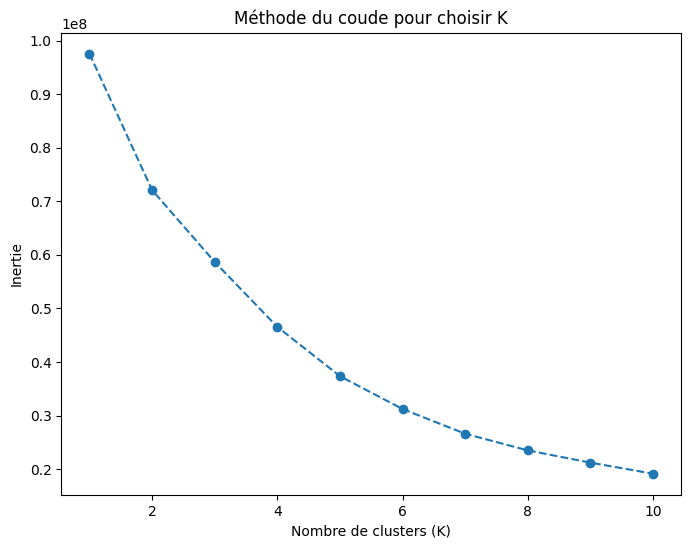

In [67]:
# Graphique
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour choisir K')
plt.show()

#### Entraînement du modèle K-means

In [68]:
# Choix de K=3 comme nombre de clusters

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_reg[['trip_seconds', 'fare', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])

C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

#### Clustering des données

In [69]:
df_reg['cluster'] = kmeans.labels_

#### Analyse des résultats

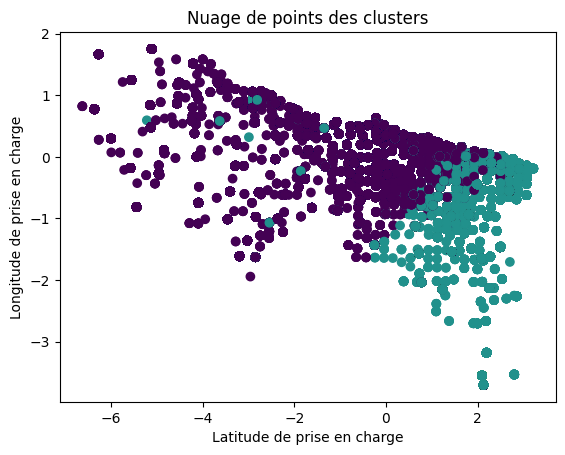

In [70]:
# Exploration des clusters et leurs caractéristiques en utilisant des visualisations et des analyses de données. Par exemple, pour afficher un nuage de points des clusters :
plt.scatter(df_reg['pickup_latitude'], df_reg['pickup_longitude'], c=df_reg['cluster'], cmap='viridis')
plt.xlabel('Latitude de prise en charge')
plt.ylabel('Longitude de prise en charge')
plt.title('Nuage de points des clusters')
plt.show()

#### Interprétation des clusters

In [71]:
# Après avoir créé les clusters, analyser leurs caractéristiques pour comprendre ce qu'ils représentent. Par exemple, pour afficher les statistiques des clusters :
cluster_stats = df_reg.groupby('cluster')[['trip_seconds', 'fare']].describe()
print(cluster_stats)

        trip_seconds                                                    \
               count      mean       std       min       25%       50%   
cluster                                                                  
0         13690323.0 -0.165424  0.444704 -0.767166 -0.452589 -0.258779   
1          2568045.0  0.881745  2.084667 -0.767166 -0.182813  0.693715   
2             1093.0  0.316461  4.322754 -0.767166 -0.474990 -0.241249   

                                    fare                                    \
              75%        max       count        mean        std        min   
cluster                                                                      
0       -0.007508  17.598061  13690323.0   -0.059020   0.128866  -0.225130   
1        1.511809  83.335776   2568045.0    0.267350   0.694457  -0.225130   
2        0.109363  78.529476      1093.0  111.105328  31.301986  55.874971   

                                                        
               25%         50

#### Evaluation du modèle

In [ ]:
# L'évaluation dépend de la tâche spécifique effectuée avec les clusters. Dans le clustering, il n'y a généralement pas de métrique intrinsèque.

# des étiquettes de classe réelles (par exemple, pour l'évaluation du clustering)
# true_labels = df_reg['true_labels']  # Remplacez 'true_labels' par la vraie étiquette si disponible

# Évaluer l'ajustement du clustering par rapport aux vraies étiquettes
# ari_score = adjusted_rand_score(true_labels, df_reg['cluster'])
# print("Adjusted Rand Index (ARI) :", ari_score)

#### Utilisation des clusters

In [73]:
# Utiliser les clusters pour prendre des décisions commerciales ou pour mieux comprendre les données. Par exemple, pour afficher les trajets dans chaque cluster :
for cluster_id in df_reg['cluster'].unique():
    cluster_data = df_reg[df_reg['cluster'] == cluster_id]
    print(f"Cluster {cluster_id} - Nombre de trajets : {len(cluster_data)}")

Cluster 1 - Nombre de trajets : 2568045
Cluster 0 - Nombre de trajets : 13690323
Cluster 2 - Nombre de trajets : 1093


#### Réajustement

In [74]:
# Si les résultats ne sont pas satisfaisants ou si de nouvelles données deviennent disponibles, réajuster le modèle K-means avec différentes configurations.
# Par exemple, avecun nombre différent de clusters (par exemple, K=5) :
kmeans = KMeans(n_clusters=5, random_state=0)
df_reg['new_cluster'] = kmeans.fit_predict(df_reg[['trip_seconds', 'fare']])

C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Répéter les étapes "Interprétation" à "Utilisation" pour les nouveaux clusters.

### Prévoir le nombre de courses de taxi pour les périodes futures sur la base de données historiques

In [82]:
# Définir la requête pour extraire les données historiques depuis BigQuery
query = """
SELECT
    DATE(trip_start_timestamp) AS date,
    COUNT(*) AS taxi_count
FROM
    `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY
    date
ORDER BY
    date
"""

In [83]:
# Exécuter la requête et stockez les résultats dans un DataFrame
df_hist = client.query(query).to_dataframe()
df_hist.head(10)

,date,taxi_count
0,2013-01-01,56953
1,2013-01-02,36830
2,2013-01-03,38808
3,2013-01-04,50391
4,2013-01-05,48352
5,2013-01-06,37549
6,2013-01-07,40173
7,2013-01-08,39395
8,2013-01-09,42443
9,2013-01-10,50096


#### Prétraitement des données

In [84]:
# Définir la colonne de date comme index de série temporelle
df_hist['date'] = pd.to_datetime(df_hist['date'])
df_hist.set_index('date', inplace=True)

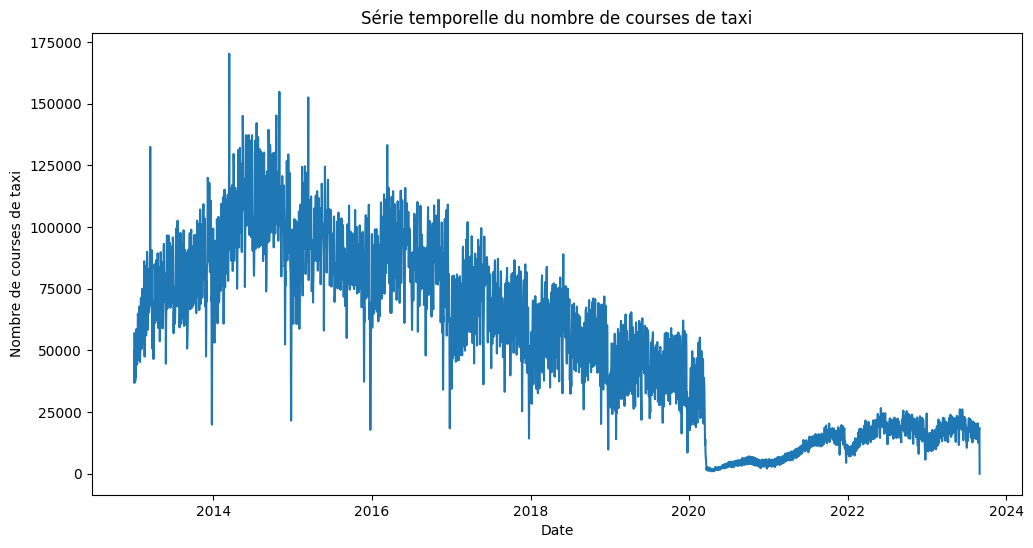

In [85]:
# Visualiser la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(df_hist.index, df_hist['taxi_count'])
plt.xlabel('Date')
plt.ylabel('Nombre de courses de taxi')
plt.title('Série temporelle du nombre de courses de taxi')
plt.show()

In [87]:
# Différencier la série temporelle pour la rendre stationnaire si nécessaire
df_diff = df_hist.diff().dropna()
df_diff

,taxi_count
date,
2013-01-02,-20123
2013-01-03,1978
2013-01-04,11583
2013-01-05,-2039
2013-01-06,-10803
...,...
2023-08-28,4557
2023-08-29,315
2023-08-30,735


In [97]:
df_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3895 entries, 2013-01-02 to 2023-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   taxi_count  3895 non-null   Int64
dtypes: Int64(1)
memory usage: 64.7 KB


#### Entraîner un modèle ARIMA sur la série temporelle différenciée

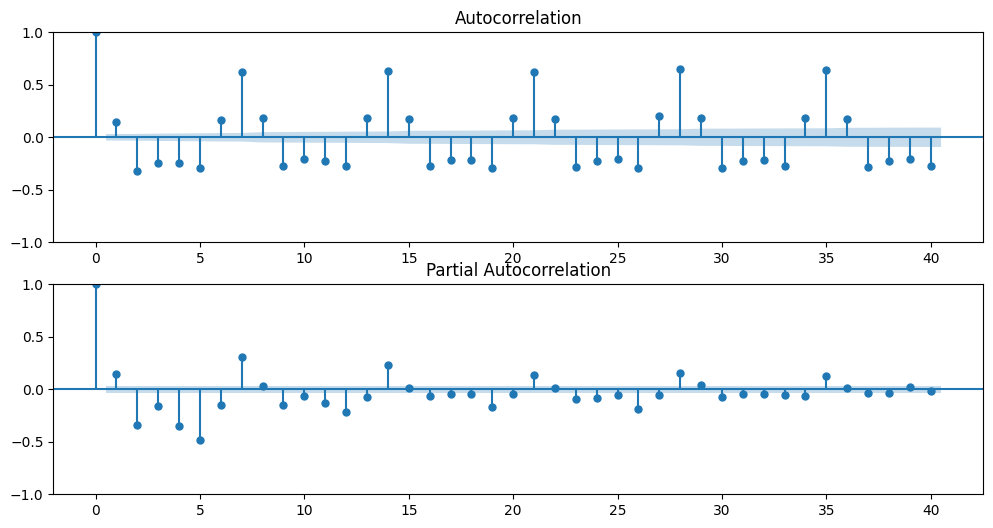

In [90]:
# Tracer les graphiques ACF et PACF pour l'identification du modèle ARIMA
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(df_diff['taxi_count'], lags=40, ax=ax1)
plot_pacf(df_diff['taxi_count'], lags=40, ax=ax2)
plt.show()

In [98]:
# Remplacer p, d et q par les valeurs appropriées
p = 1  # Ordre de l'autorégression
d = 1  # Ordre de différenciation
q = 1  # Ordre de la moyenne mobile

#### Créer et entraîner le modèle ARIMA

In [99]:
model = ARIMA(df_diff['taxi_count'], order=(p, d, q))
model_fit = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

ERREUR !!

#### Vérification des données de la série temporelle

In [101]:
df_diff['taxi_count'].head()

date
2013-01-02    -20123
2013-01-03      1978
2013-01-04     11583
2013-01-05     -2039
2013-01-06    -10803
Name: taxi_count, dtype: Int64

#### Normalisation / Transformation des données

In [102]:
df_diff['taxi_count'] = np.log(df_diff['taxi_count'] + 1)  # Transformation logarithmique avec ajout de 1 pour éviter les valeurs nulles

C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:582: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
C:\Users\Laetitia_Deken\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:582: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)


#### Suppression des valeurs extrêmes

In [103]:
df_diff = df_diff[df_diff['taxi_count'] >= 0]  # Suppression des observations avec des valeurs négatives

#### Nouvelle tentative de créer le modèle ARIMA + convertir la série en tableau Numpy

In [106]:
taxi_count_array = np.asarray(df_diff['taxi_count'], dtype=np.float64)
model = ARIMA(taxi_count_array, order=(p, d, q))
model_fit = model.fit()

#### Visualisation des résultats

In [107]:
forecast_steps = 12  # Par exemple, prévoir les 12 prochains mois
forecast = model_fit.get_forecast(steps=forecast_steps)

# Obtenir les prévisions et les intervalles de confiance
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

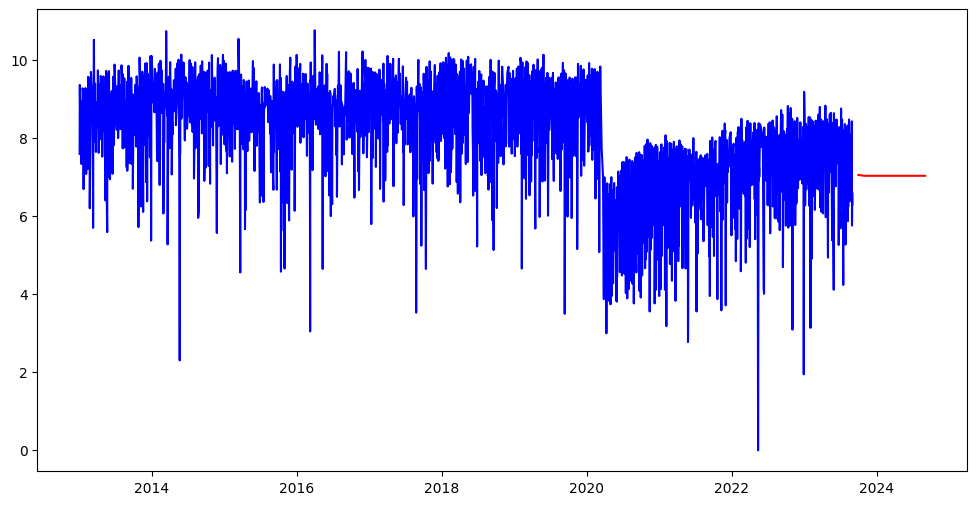

In [109]:
# Nombre de pas de temps à prévoir (par exemple, 12 prochains mois)
forecast_steps = 12

# Dernière date dans vos données réelles
last_date = df_diff.index[-1]

# Créer un tableau de dates pour les prévisions en ajoutant des décalages à la dernière date
forecast_dates = [last_date + pd.DateOffset(months=i+1) for i in range(forecast_steps)]

# Données réelles
actual_data = df_diff['taxi_count']

# Prévisions et intervalles de confiance
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Créer un graphique

plt.figure(figsize=(12, 6))
plt.plot(df_diff.index, actual_data, label='Données réelles', color='blue')
plt.plot(forecast_dates, forecast_values, label='Prévisions', color='red')
plt.fill_between(forecast_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Intervalle de confiance')
plt.xlabel('Date')
plt.ylabel('Taxi Count')
plt.title('Prévisions ARIMA avec Intervalle de Confiance')
plt.legend()
plt.show()

### Prédire le montant du tarif en fonction d'un plus grand nombre de caractéristiques telles que les conditions météorologiques, le trafic et les caractéristiques du conducteur

### Modèles de réseaux neuronaux : Perceptron multicouche (MLP) 

In [111]:
# Rrequête SQL pour extraire les données de la table taxi_trips
query = """
SELECT
  trip_seconds,
  trip_miles,
  fare,
  tips,
  tolls,
  extras,
  trip_total,
  pickup_latitude,
  pickup_longitude,
  dropoff_latitude,
  dropoff_longitude
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips` TABLESAMPLE SYSTEM (5 PERCENT)
  """

In [112]:
df_mlp = client.query(query).to_dataframe()
df_mlp.head(10)

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,303,0.76,5.75,0.0,0.0,5.0,11.25,41.900221,-87.629105,41.892042,-87.631864
1,780,5.18,15.75,0.0,0.0,0.0,15.75,41.958155,-87.653022,41.895033,-87.619711
2,720,1.31,8.25,0.0,0.0,0.0,8.25,41.904935,-87.649907,41.892073,-87.628874
3,360,1.20,6.25,0.0,0.0,1.0,7.25,41.817366,-87.698861,41.829922,-87.672503
4,360,1.00,6.00,0.0,0.0,0.0,6.00,41.914747,-87.654007,41.929078,-87.646293
5,480,1.60,8.00,0.0,0.0,1.0,9.00,41.898306,-87.653614,41.890922,-87.618868
6,720,3.58,13.00,0.0,0.0,0.0,13.00,41.943155,-87.640698,41.890922,-87.618868
7,840,6.50,18.75,0.0,0.0,1.0,19.75,41.790567,-87.594015,41.859350,-87.617358
8,2100,4.90,17.00,0.0,0.0,1.0,18.00,41.922083,-87.634156,41.879255,-87.642649
9,840,3.30,12.00,2.5,0.0,0.0,15.00,41.907492,-87.635760,41.919225,-87.671446


#### Prétraitement des données

In [116]:
# Supprimer les lignes avec des valeurs manquantes
df_mlp = df_mlp.dropna()

#### Normalisation des caractéristiques

In [117]:
# Normaliser les caractéristiques numériques (par exemple, fare, trip_seconds, trip_miles, etc.)
scaler = StandardScaler()
numeric_columns = ['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
df_mlp[numeric_columns] = scaler.fit_transform(df_mlp[numeric_columns])

C:\Users\Laetitia_Deken\AppData\Local\Temp\ipykernel_18644\928122504.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mlp[numeric_columns] = scaler.fit_transform(df_mlp[numeric_columns])


#### Diviser les données en ensembles d'entraînement et de test

In [118]:
X = df_mlp.drop(columns=['fare'])  # Caractéristiques
y = df_mlp['fare']  # Cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Créer et entraîner le modèle MLP

In [119]:
# Créer le modèle MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)

# Entraîner le modèle sur les données d'entraînement
mlp_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

#### Évaluer la performance du modèle

In [120]:
# Prédictions sur l'ensemble de test
y_pred = mlp_model.predict(X_test)

# Calculer le RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculer le R2
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 0.14243579533189762
R2: 0.9796654858451739


Un RMSE bas et un R2 élevé indiquent que le modèle MLP fonctionne bien pour prédire le montant du tarif en fonction des caractéristiques utilisées. Un RMSE bas signifie que les prédictions sont proches des valeurs réelles, tandis qu'un R2 élevé suggère que le modèle explique bien la variance des données.

Le modèle MLP est ici performant !

#### Optimisation des hyperparamètres

Recherche aléatoire des hyperparamètres avec RandomizedSearchCV :

In [ ]:
# Créer le modèle MLP
mlp_model = MLPRegressor(random_state=42)

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64, 32), (32, 16)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000]
}

# Utiliser RandomizedSearchCV pour trouver les meilleures combinaisons d'hyperparamètres
random_search = RandomizedSearchCV(mlp_model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:")
print(random_search.best_params_)

# Obtenir le modèle avec les meilleurs hyperparamètres
best_mlp_model = random_search.best_estimator_

# Évaluer le modèle sur l'ensemble de test
y_pred = best_mlp_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE avec meilleurs hyperparamètres: {rmse}")

Recherche en grille des hyperparamètres avec GridSearchCV :

In [ ]:
# Créer le modèle MLP
mlp_model = MLPRegressor(random_state=42)

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64, 32), (32, 16)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000]
}

# Utiliser GridSearchCV pour trouver les meilleures combinaisons d'hyperparamètres
grid_search = GridSearchCV(mlp_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:")
print(grid_search.best_params_)

# Obtenir le modèle avec les meilleurs hyperparamètres
best_mlp_model = grid_search.best_estimator_

# Évaluer le modèle sur l'ensemble de test
y_pred = best_mlp_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE avec meilleurs hyperparamètres: {rmse}")

#### Utiliser le modèle pour les prédictions

In [ ]:
# Exemple de prédiction sur de nouvelles données
new_data = pd.DataFrame({'trip_seconds': [600], 'trip_miles': [3.0], 'tips': [2.0], 'tolls': [0.0], 'extras': [1.0], 'trip_total': [10.0], 'pickup_latitude': [41.8781], 'pickup_longitude': [-87.6298], 'dropoff_latitude': [41.8917], 'dropoff_longitude': [-87.6322]})
predicted_fare = mlp_model.predict(new_data)
print(f"Predicted Fare: {predicted_fare[0]}")